<heading><b>A2: Unsupervised Analysis Project (Team)</b></heading>
<body>Machine Learning | MsBA | Hult International Business School<br>
by <b>Livia Marchi Ranieri, Dhananjay Sonawane, Juan Pablo Jaramillo, Wai Hoi Li</b>
</body>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<body>
<h1>Introduction</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

This case brings the question of consumer decisions when purchasing a new computer. The brands in question are Apple, Microsoft, and Google. The companies have been researching consumer profiles and behaviors in order to understand their decision-making process. Our team of analysts has studied different personality and demographics profiles and their preferences in computers. 

The process of profiling the consumers uses the Big Five personality test and the Hult DNA. The Big Five is a test to determine which of five personality groups defines a person according to their individual characteristics (Goldberg, 1993). These include openness, conscientiousness, extraversion, agreeableness, and neuroticism.

In terms of the Hult DNA, it is a set of skills put together by Hult International Business School and used as a template to develop students. The skills have three main pillars: thinking, communicating, and team building (Shaheem, 2019). 

The data set had Big Five and Hult DNA personality questions along with demographics questions, such as age, gender, nationality, ethnicity, and academic program. This is important to our analysis because it helps to understand the profile of the responders and their backgrounds.

In order to better comprehend the responders’ personalities, we relabeled the columns from questions to personality traits that would result from relating with that question. For instance, somebody who relates with 'Talk to a lot of different people at parties' was labeled as 'SOCIAL'. This was done to help us find specific traits within each respondent. 
</body>
<br><br>
<h1>Libraries, user-defined functions and data import</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Libraries, custom function import</h2>

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from IPython.display import display_html


########################################
# setting display options
########################################
# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# display_side_by_side
########################################
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)        

<h2>Data import and exploration</h2>

In [3]:
# Loading data

survey = pd.read_excel('./datasets/survey_data.xlsx')
survey.head(n = 5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


In [4]:
# Checking information about each column

survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 79 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   surveyID                                                                      137 non-null    int64 
 1   Am the life of the party                                                      137 non-null    int64 
 2   Feel little concern for others                                                137 non-null    int64 
 3   Am always prepared                                                            137 non-null    int64 
 4   Get stressed out easily                                                       137 non-null    int64 
 5   Have a rich vocabulary                                                        137 non-null    int64 
 6   Don't talk a lot                          

In [5]:
# Checking the description of the dataset

survey.describe(include = 'number').round(decimals = 2)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

In [6]:
# Checking if any missing data

survey.isnull().any().any()

False

<body>
<h2>Data Prepping</h2>



Looking to analyze and interpret the data, we first aimed to understand the questions asked and the form of response. The questions are related to the personality domains, and answers can range from 1 (do not relate to it) to 5 (extremely relate to it).

Some of the questions asked were opposite to the traditional personality domains, for instance, 'Don’t persuasively sell a vision or idea' is the opposite of one of the skills for Hult’s communicating personality domain. Therefore, we created a formula that would determine the responder’s final score depending on their answers. The scores calculated should be between zero and forty (Goldberg, 1992). 

Beyond that, in order to determine the reliableness of the answers, there were duplicate questions in the data sets. For example, the Hult DNA question of 'Respond effectively to multiple priorities'. Since these questions are not placed right next to each other, the respondent might change their mind or be influenced by other factors. 

In order to take care of this, we added 1 and minus 1 to the answers of the original questions. If the answers to the duplicated questions are out of the range, we mark them as invalid and drop the row. Furthermore, we averaged the scores given and rescaled them, For instance, someone who responded 3 and 4 for the duplicate question would have their scores averaged and rescaled in order to truly reflect their responses.
</body>

In [7]:
survey.columns=survey.columns.str.replace("'",'') # Removing the apostrophe so the code can be read properly
survey.keys() # Displaying the results

Index(['surveyID', 'Am the life of the party', 'Feel little concern for others', 'Am always prepared', 'Get stressed out easily', 'Have a rich vocabulary', 'Dont talk a lot', 'Am interested in people', 'Leave my belongings around', 'Am relaxed most of the time', 'Have difficulty understanding abstract ideas', 'Feel comfortable around people', 'Insult people', 'Pay attention to details', 'Worry about things', 'Have a vivid imagination', 'Keep in the background', 'Sympathize with others feelings', 'Make a mess of things', 'Seldom feel blue', 'Am not interested in abstract ideas', 'Start conversations', 'Am not interested in other peoples problems', 'Get chores done right away', 'Am easily disturbed', 'Have excellent ideas', 'Have little to say', 'Have a soft heart', 'Often forget to put things back in their proper place', 'Get upset easily', 'Do not have a good imagination', 'Talk to a lot of different people at parties', 'Am not really interested in others', 'Like order',
       'Change

In [8]:
# dropping the word "laptop" from windows laptop

survey['What laptop do you currently have?']=survey['What laptop do you currently have?'].str.replace(" laptop",'')
survey['What laptop would you buy in next assuming if all laptops cost the same?']=survey['What laptop would you buy in next assuming if all laptops cost the same?'].str.replace(" laptop",'')
survey.iloc[:,-7:].head(n = 5)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,Windows,Windows,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,Windows,Windows,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,Windows,Windows,One year Business Analytics,26,Female,indian,West Asian / Indian
4,Macbook,Windows,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


In [9]:
# Coverting all letters to lower case

tar_lst = ['What laptop do you currently have?', 'What laptop would you buy in next assuming if all laptops cost the same?', 'What program are you in?', 'Gender', 'What is your nationality? ', 'What is your ethnicity?']
for num in tar_lst:
    survey.loc[:,num] = survey.loc[:,num].str.lower()
survey.iloc[:,-5:].head(5)   

,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,dd (mib & business analytics),25,female,ecuador,hispanic / latino
1,one year business analytics,27,male,ecuador,hispanic / latino
2,one year business analytics,25,male,indian,west asian / indian
3,one year business analytics,26,female,indian,west asian / indian
4,dd (mba & disruptive innovation),27,male,china,far east asian


<h3>Renaming columns</h3>

In [10]:
survey_copy = survey.copy() # Making a copy of the data set for safety reasons 
survey_copy.head(n = 5) # Displaying the column names to rename them

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Dont talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other peoples problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Dont like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Dont mind being the center of attention,Feel others emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Dont generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules arent clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules arent clear.1",Encourage direct and open discussions.1,Listen carefully to others,Dont persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Cant rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,macbook,macbook,dd (mib & business analytics),25,female,ecuador,hispanic / latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,windows,windows,one year business analytics,27,male,ecuador,hispanic / latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,windows,windows,one year business analytics,25,male,indian,west asian / indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,windows,windows,one year business analytics,26,female,indian,west asian / indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,macbook,windows,dd (mba & disruptive innovation),27,male,china,far east asian


In [11]:
# Creating a list that contain new name for the columns

og_colname = survey_copy.keys()
new_colname = ['ID', 'LIFE_OF_PARTY', 'LIL_CONCERN_FOR_OTHERS', 'ALWAYS_PREPARED', 'STRESSED_EASILY',
              'RICH_VOCAB', 'TALK_LESS', 'INTEREST_IN_PPL', 'MESSY', 'RELAXED', 'DIFF_W_ABSTRACT_IDEA',
              'COMFT_W_PPL', 'INSULTING', 'DETAIL_ORIENTED', 'WORRIER', 'CREATIVE', 'INTROVERT', 'SYMPATHETIC',
              'MAKE_A_MESS', 'OPTMIST', 'NOT_INT_IN_ABSTRACT', 'CONV_STARTER', 'LACK_OF_SYMPATHY', 'PROACTIVE',
              'EASILY_DIST', 'INNOVATIVE', 'LITTLE_TO_SAY', 'SOFT_HEART', 'FORGETFUL', 'SENSITIVE',
              'NOT_CREATIVE', 'SOCIAL', 'EGOCENTRIC', 'ORGANIZED', 'MOODY', 'WITTY', 'SHY', 'EMPATHETIC',
              'LAZY', '2_MOODY', 'ELOQUENT', 'CENTER_OF_ATTENTION', '2_EMPATHETIC', 'PUNCTUAL', 'GRUMPY',
              'REFLECTIVE', 'AMBIVERT', 'COOL', 'PERFECTIONIST', 'SAD', 'IMAGINATIVE', 'PATTERN_OBSERVANT_HULT',
              'TRADITIONAL', 'SELF_AWARE_HULT', 'GROWTH_MINDSET_HULT', 'MULTI_TASKER', 'INITIATOR', 'OPEN_DISCUSSIONS', 
              'MULTI_TASKER_2', 'INITIATOR_2', 'OPEN_DISCUSSIONS_2', 'ACTIVE_LISTENER_HULT', 'ORGANIC_INFLUENCER',
              'AFFILIATOR_HULT', 'DIVERSE_TOLERANT_HULT', 'NEGOTIATOR', 'NOT_LEADER', 'STRATEGIC_PLANNER',
              'PROBLEM_SOLVER_HULT', 'FEEDBACK_FRUITS_HULT', 'MENTOR_HULT', 'RESULTS_DRIVEN_HULT', 'CURRENT_LAPTOP',
              'FUTURE_LAPTOP', 'PROGRAM_HULT', 'AGE', 'GENDER', 'NATIONALITY', 'ETHNICITY'] 

# Displaying the original and new names using a for loop

r = 0
for n_colname in new_colname:
    print(f" '{og_colname[r]}':'{n_colname}', ")
    r = r + 1


 'surveyID':'ID', 
 'Am the life of the party':'LIFE_OF_PARTY', 
 'Feel little concern for others':'LIL_CONCERN_FOR_OTHERS', 
 'Am always prepared':'ALWAYS_PREPARED', 
 'Get stressed out easily':'STRESSED_EASILY', 
 'Have a rich vocabulary':'RICH_VOCAB', 
 'Dont talk a lot':'TALK_LESS', 
 'Am interested in people':'INTEREST_IN_PPL', 
 'Leave my belongings around':'MESSY', 
 'Am relaxed most of the time':'RELAXED', 
 'Have difficulty understanding abstract ideas':'DIFF_W_ABSTRACT_IDEA', 
 'Feel comfortable around people':'COMFT_W_PPL', 
 'Insult people':'INSULTING', 
 'Pay attention to details':'DETAIL_ORIENTED', 
 'Worry about things':'WORRIER', 
 'Have a vivid imagination':'CREATIVE', 
 'Keep in the background':'INTROVERT', 
 'Sympathize with others feelings':'SYMPATHETIC', 
 'Make a mess of things':'MAKE_A_MESS', 
 'Seldom feel blue':'OPTMIST', 
 'Am not interested in abstract ideas':'NOT_INT_IN_ABSTRACT', 
 'Start conversations':'CONV_STARTER', 
 'Am not interested in other peoples 

In [12]:
# Replacing the original with the new names

survey_copy = survey_copy.rename(columns={ 'surveyID':'ID', 
                                         'Am the life of the party':'LIFE_OF_PARTY', 
                                         'Feel little concern for others':'LIL_CONCERN_FOR_OTHERS', 
                                         'Am always prepared':'ALWAYS_PREPARED', 
                                         'Get stressed out easily':'STRESSED_EASILY', 
                                         'Have a rich vocabulary':'RICH_VOCAB', 
                                         'Dont talk a lot':'TALK_LESS', 
                                         'Am interested in people':'INTEREST_IN_PPL', 
                                         'Leave my belongings around':'MESSY', 
                                         'Am relaxed most of the time':'RELAXED', 
                                         'Have difficulty understanding abstract ideas':'DIFF_W_ABSTRACT_IDEA', 
                                         'Feel comfortable around people':'COMFT_W_PPL', 
                                         'Insult people':'INSULTING', 
                                         'Pay attention to details':'DETAIL_ORIENTED', 
                                         'Worry about things':'WORRIER', 
                                         'Have a vivid imagination':'CREATIVE', 
                                         'Keep in the background':'INTROVERT', 
                                         'Sympathize with others feelings':'SYMPATHETIC', 
                                         'Make a mess of things':'MAKE_A_MESS', 
                                         'Seldom feel blue':'OPTMIST', 
                                         'Am not interested in abstract ideas':'NOT_INT_IN_ABSTRACT', 
                                         'Start conversations':'CONV_STARTER', 
                                         'Am not interested in other peoples problems':'LACK_OF_SYMPATHY', 
                                         'Get chores done right away':'PROACTIVE', 
                                         'Am easily disturbed':'EASILY_DIST', 
                                         'Have excellent ideas':'INNOVATIVE', 
                                         'Have little to say':'LITTLE_TO_SAY', 
                                         'Have a soft heart':'SOFT_HEART', 
                                         'Often forget to put things back in their proper place':'FORGETFUL', 
                                         'Get upset easily':'SENSITIVE', 
                                         'Do not have a good imagination':'NOT_CREATIVE', 
                                         'Talk to a lot of different people at parties':'SOCIAL', 
                                         'Am not really interested in others':'EGOCENTRIC', 
                                         'Like order':'ORGANIZED', 
                                         'Change my mood a lot':'MOODY', 
                                         'Am quick to understand things':'WITTY', 
                                         'Dont like to draw attention to myself':'SHY', 
                                         'Take time out for others':'EMPATHETIC', 
                                         'Shirk my duties':'LAZY', 
                                         'Have frequent mood swings':'2_MOODY', 
                                         'Use difficult words':'ELOQUENT', 
                                         'Dont mind being the center of attention':'CENTER_OF_ATTENTION', 
                                         'Feel others emotions':'2_EMPATHETIC', 
                                         'Follow a schedule':'PUNCTUAL', 
                                         'Get irritated easily':'GRUMPY', 
                                         'Spend time reflecting on things':'REFLECTIVE', 
                                         'Am quiet around strangers':'AMBIVERT', 
                                         'Make people feel at ease':'COOL', 
                                         'Am exacting in my work':'PERFECTIONIST', 
                                         'Often feel blue':'SAD', 
                                         'Am full of ideas':'IMAGINATIVE', 
                                         'See underlying patterns in complex situations':'PATTERN_OBSERVANT_HULT', 
                                         'Dont  generate ideas that are new and different':'TRADITIONAL', 
                                         'Demonstrate an awareness of personal strengths and limitations':'SELF_AWARE_HULT', 
                                         'Display a growth mindset':'GROWTH_MINDSET_HULT', 
                                         'Respond effectively to multiple priorities':'MULTI_TASKER', 
                                         'Take initiative even when circumstances, objectives, or rules arent clear':'INITIATOR', 
                                         'Encourage direct and open discussions':'OPEN_DISCUSSIONS', 
                                         'Respond effectively to multiple priorities.1':'MULTI_TASKER_2', 
                                         'Take initiative even when circumstances, objectives, or rules arent clear.1':'INITIATOR_2', 
                                         'Encourage direct and open discussions.1':'OPEN_DISCUSSIONS_2', 
                                         'Listen carefully to others':'ACTIVE_LISTENER_HULT', 
                                         'Dont persuasively sell a vision or idea':'ORGANIC_INFLUENCER', 
                                         'Build cooperative relationships':'AFFILIATOR_HULT', 
                                         'Work well with people from diverse cultural backgrounds':'DIVERSE_TOLERANT_HULT', 
                                         'Effectively negotiate interests, resources, and roles':'NEGOTIATOR', 
                                         'Cant rally people on the team around a common goal':'NOT_LEADER', 
                                         'Translate ideas into plans that are organized and realistic':'STRATEGIC_PLANNER', 
                                         'Resolve conflicts constructively':'PROBLEM_SOLVER_HULT', 
                                         'Seek and use feedback from teammates':'FEEDBACK_FRUITS_HULT', 
                                         'Coach teammates for performance and growth':'MENTOR_HULT', 
                                         'Drive for results':'RESULTS_DRIVEN_HULT', 
                                         'What laptop do you currently have?':'CURRENT_LAPTOP', 
                                         'What laptop would you buy in next assuming if all laptops cost the same?':'FUTURE_LAPTOP', 
                                         'What program are you in?':'PROGRAM_HULT', 
                                         'What is your age?':'AGE', 
                                         'Gender':'GENDER', 
                                         'What is your nationality? ':'NATIONALITY', 
                                         'What is your ethnicity?':'ETHNICITY'})

survey_copy.head(n = 5)

,ID,LIFE_OF_PARTY,LIL_CONCERN_FOR_OTHERS,ALWAYS_PREPARED,STRESSED_EASILY,RICH_VOCAB,TALK_LESS,INTEREST_IN_PPL,MESSY,RELAXED,DIFF_W_ABSTRACT_IDEA,COMFT_W_PPL,INSULTING,DETAIL_ORIENTED,WORRIER,CREATIVE,INTROVERT,SYMPATHETIC,MAKE_A_MESS,OPTMIST,NOT_INT_IN_ABSTRACT,CONV_STARTER,LACK_OF_SYMPATHY,PROACTIVE,EASILY_DIST,INNOVATIVE,LITTLE_TO_SAY,SOFT_HEART,FORGETFUL,SENSITIVE,NOT_CREATIVE,SOCIAL,EGOCENTRIC,ORGANIZED,MOODY,WITTY,SHY,EMPATHETIC,LAZY,2_MOODY,ELOQUENT,CENTER_OF_ATTENTION,2_EMPATHETIC,PUNCTUAL,GRUMPY,REFLECTIVE,AMBIVERT,COOL,PERFECTIONIST,SAD,IMAGINATIVE,PATTERN_OBSERVANT_HULT,TRADITIONAL,SELF_AWARE_HULT,GROWTH_MINDSET_HULT,MULTI_TASKER,INITIATOR,OPEN_DISCUSSIONS,MULTI_TASKER_2,INITIATOR_2,OPEN_DISCUSSIONS_2,ACTIVE_LISTENER_HULT,ORGANIC_INFLUENCER,AFFILIATOR_HULT,DIVERSE_TOLERANT_HULT,NEGOTIATOR,NOT_LEADER,STRATEGIC_PLANNER,PROBLEM_SOLVER_HULT,FEEDBACK_FRUITS_HULT,MENTOR_HULT,RESULTS_DRIVEN_HULT,CURRENT_LAPTOP,FUTURE_LAPTOP,PROGRAM_HULT,AGE,GENDER,NATIONALITY,ETHNICITY
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,macbook,macbook,dd (mib & business analytics),25,female,ecuador,hispanic / latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,windows,windows,one year business analytics,27,male,ecuador,hispanic / latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,windows,windows,one year business analytics,25,male,indian,west asian / indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,windows,windows,one year business analytics,26,female,indian,west asian / indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,macbook,windows,dd (mba & disruptive innovation),27,male,china,far east asian


<body>
<h4>Initial Exploratory Analysis</h4> 
    
    
In our continued task to better map and understand the profiles of each respondent, we started an exploratory data analysis.  This showed that 43.1% of the people who filled the survey were female-identifying and 56.9% were male-identifying. Beyond that, it is important to note the programs in which the Hult students are.  
   
</body>    

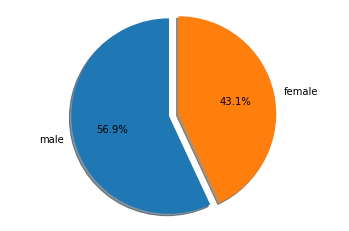

In [13]:
# Plotting Gender Ratio in the Dataset

gender_plot = survey_copy['GENDER'].value_counts()
labels = (np.array(gender_plot.index))
sizes = (np.array((gender_plot / gender_plot.sum())*100))
explode = (0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

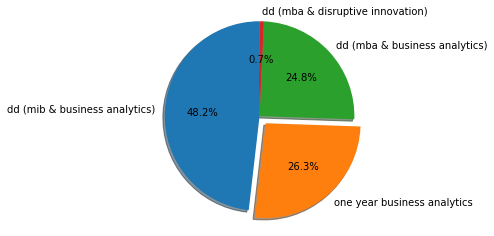

In [14]:
# Plotting Program Ratio in the Dataset

course = survey_copy['PROGRAM_HULT'].value_counts()
labels = (np.array(course.index))
sizes = (np.array((course / course.sum())*100))
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


<body>
In terms of age, the responders are mainly within the 22-29-year-old age group. However, the ages range from 21 until 49 years old. This is important because preferences change for laptop purchases as people grow old. For instance, AARP conducted a research with over 3,000 people over 30 in the USA to understand their preferences in technology. 23% of the responders noted that they needed a computer with a bigger screen due to eye-sight issues, for instance (Kakulla, 2020). 
</body>

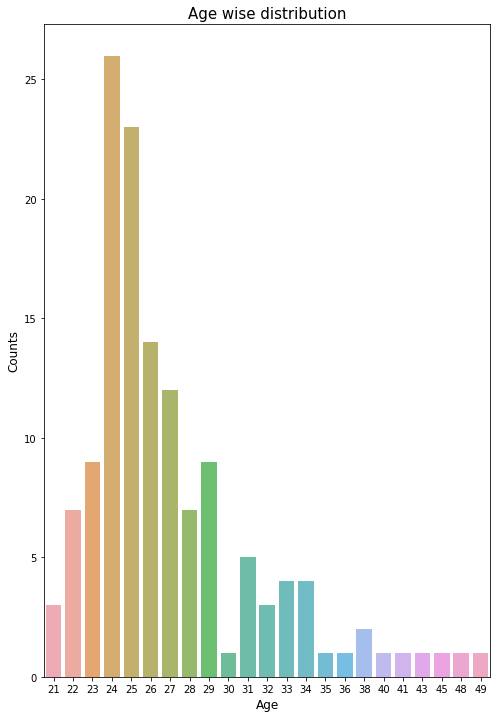

In [15]:
# Plotting the distribution/ frequency of Responder's age

age = survey_copy['AGE'].value_counts()
plt.figure(figsize=(8,12))
sns.barplot(y=age.values, x=age.index, alpha=0.8)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Age wise distribution", fontsize=15)
plt.show()

In [16]:
# Changing the different types of word format to capitalize form 
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].str.capitalize()

# Combining different values of Nationalities together
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Usa', 'American')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Brazil', 'Brazilian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('China', 'Chinese')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Colombia', 'Colombian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Congolese (DR CONGO)', 'Congolese')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Czech Republic', 'Czech')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Ecuador', 'Ecuadorian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Germany', 'German')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Indian.', 'Indian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Indonesia', 'Indonesian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Nigeria', 'Nigerian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Peru', 'Peruvian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Russia', 'Russian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Spain', 'Spanish')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Canada', 'Canadian')
survey_copy['NATIONALITY'] = survey_copy['NATIONALITY'].replace('Philippines ', 'filipino')

<body>
Nevertheless, the survey conducted in our case brings people from different nationalities. The top five nationalities present in the survey are Indian, Chinese, German, Peruvian, and American. According to India today, a national news website, the preferences in the country include weight and memory. Other features, such as DVD players and newer processors are not as important (Anwer, 2018). 
</body>

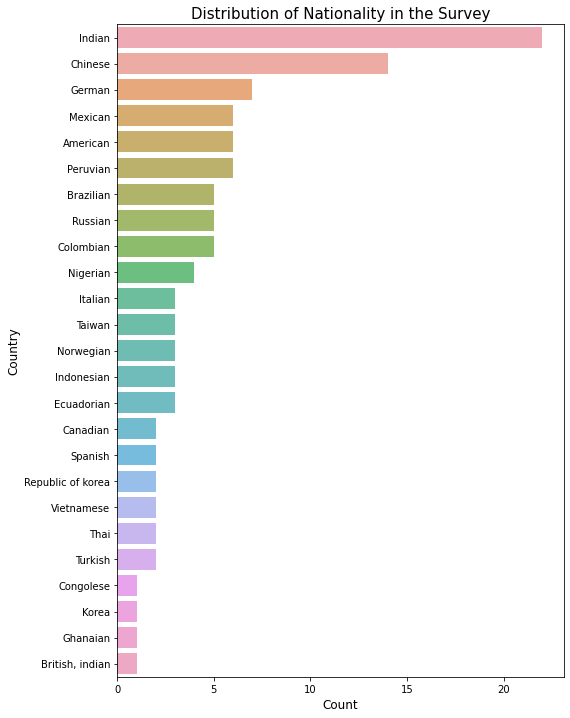

In [17]:
# Plotting the distribution/ frequency of Responder's Nationality - Top 25

nationality = survey_copy['NATIONALITY'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=nationality.index, x=nationality.values, alpha=0.8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Distribution of Nationality in the Survey", fontsize=15)
plt.show()

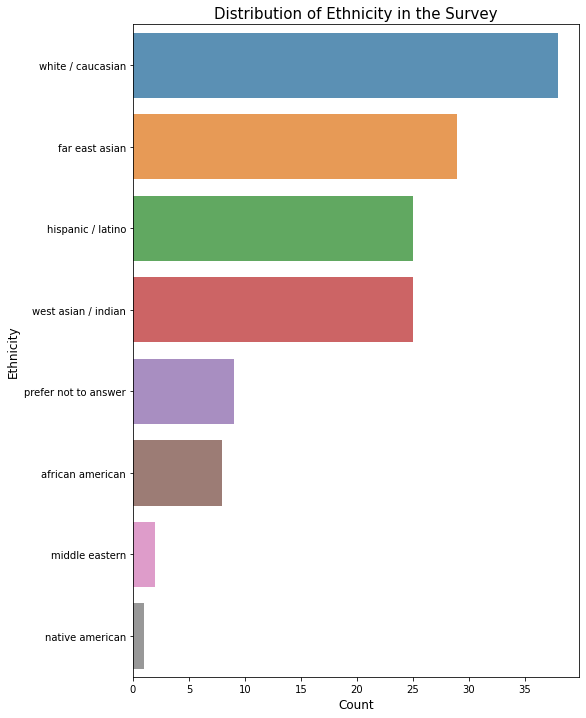

In [18]:
# Plotting the distribution/ frequency of Responder's Nationality

Ethinicity = survey_copy['ETHNICITY'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=Ethinicity.index, x=Ethinicity.values, alpha=0.8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Ethnicity', fontsize=12)
plt.title("Distribution of Ethnicity in the Survey", fontsize=15)
plt.show()

<body>
When analyzing the data set, we found that out of 137 responders, 77 noted they would like to purchase a MacBook (Apple) computer, 56 would like a Windows computer, and 4 a Chromebook.  
</body>

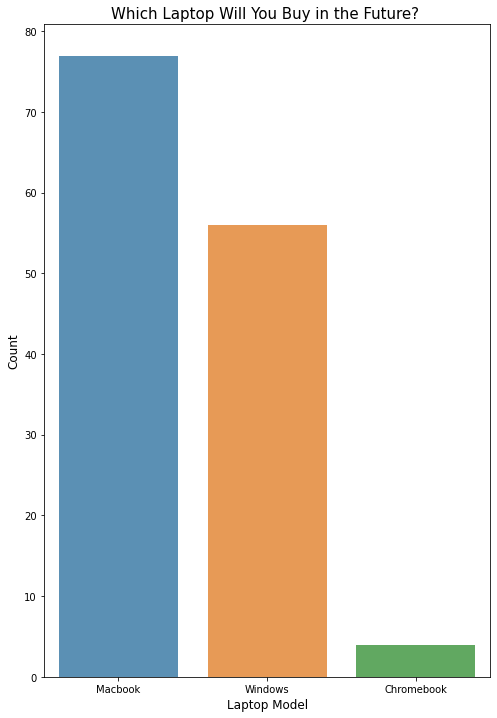

In [19]:
# Willingness of buying laptop in Future

laptops = ['Macbook', 'Windows', 'Chromebook']
counts = [77, 56, 4]
plt.figure(figsize=(8,12))
sns.barplot(y=counts, x=laptops, alpha=0.8)
plt.xlabel('Laptop Model',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Which Laptop Will You Buy in the Future? ", fontsize=15)

plt.show()

<body>
It is important to note that, out of the responders who stated they would change their laptop brands, 13 were MacBook owners, 5 were Windows owners, and 3 were Chromebook owners. 
</body>

In [20]:
# Create a loop to explore the particiapnts' willingness on changing laptop in future

survey_copy['CHANGE_LAPTOP'] = 0
for index, row in survey_copy.loc[:,['CURRENT_LAPTOP','FUTURE_LAPTOP']].iterrows():
    if row['CURRENT_LAPTOP'] == row['FUTURE_LAPTOP']:
        survey_copy.loc[index, 'CHANGE_LAPTOP'] = 'No change'
    elif row['CURRENT_LAPTOP'] != row['FUTURE_LAPTOP']:
        survey_copy.loc[index, 'CHANGE_LAPTOP'] = row['FUTURE_LAPTOP']
    else:
        survey_copy.loc[index, 'CHANGE_LAPTOP'] = 'STH IS WRONG!!'

print(f"""
The number of people changing laptop type in the future:

{survey_copy['CHANGE_LAPTOP'].value_counts()}
""")


The number of people changing laptop type in the future:

No change     114
macbook        14
windows         5
chromebook      4
Name: CHANGE_LAPTOP, dtype: int64



In [21]:
# Create a loop to explore the particiapnts' willingness on changing laptop in future

survey_copy['NO_CHANGE_LAPTOP'] = 0
for index, row in survey_copy.loc[:,['CURRENT_LAPTOP','FUTURE_LAPTOP']].iterrows():
    if row['CURRENT_LAPTOP'] == row['FUTURE_LAPTOP']:
        survey_copy.loc[index, 'NO_CHANGE_LAPTOP'] = row['CURRENT_LAPTOP']
    elif row['CURRENT_LAPTOP'] != row['FUTURE_LAPTOP']:
        survey_copy.loc[index, 'NO_CHANGE_LAPTOP'] = 'Changed laptop'
    else:
        survey_copy.loc[index, 'NO_CHANGE_LAPTOP'] = 'STH IS WRONG!!'

print(f"""
The number of people who won't change the laptop in future per type:
        
{survey_copy['NO_CHANGE_LAPTOP'].value_counts()}       
""")


The number of people who won't change the laptop in future per type:
        
macbook           63
windows           51
Changed laptop    23
Name: NO_CHANGE_LAPTOP, dtype: int64       



<h3>Setting dictionary</h3>

In [22]:
# Creating a dictionary for suvey result
# Questions for the Hult DNA
'''
 51. 'PATTERN_OBSERVANT_HULT':'See underlying patterns in complex situations', 
 52. 'TRADITIONAL':'Dont  generate ideas that are new and different', 
 53. 'SELF_AWARE_HULT':'Demonstrate an awareness of personal strengths and limitations', 
 54. 'GROWTH_MINDSET_HULT':'Display a growth mindset', 
 55. 'MULTI_TASKER':'Respond effectively to multiple priorities', 
 56. 'INITIATOR':'Take initiative even when circumstances, objectives, or rules arent clear', 
 57. 'OPEN_DISCUSSIONS':'Encourage direct and open discussions', 
 58. 'MULTI_TASKER_2':'Respond effectively to multiple priorities.1', 
 59. 'INITIATOR_2':'Take initiative even when circumstances, objectives, or rules arent clear.1', 
 60. 'OPEN_DISCUSSIONS_2':'Encourage direct and open discussions.1', 
 61. 'ACTIVE_LISTENER_HULT':'Listen carefully to others', 
 62. 'ORGANIC_INFLUENCER':'Dont persuasively sell a vision or idea', 
 63. 'AFFILIATOR_HULT':'Build cooperative relationships', 
 64. 'DIVERSE_TOLERANT_HULT':'Work well with people from diverse cultural backgrounds', 
 65. 'NEGOTIATOR':'Effectively negotiate interests, resources, and roles', 
 66. 'NOT_LEADER':'Cant rally people on the team around a common goal', 
 67. 'STRATEGIC_PLANNER':'Translate ideas into plans that are organized and realistic', 
 68. 'PROBLEM_SOLVER_HULT':'Resolve conflicts constructively', 
 69. 'FEEDBACK_FRUITS_HULT':'Seek and use feedback from teammates', 
 70. 'MENTOR_HULT':'Coach teammates for performance and growth', 
 71. 'RESULTS_DRIVEN_HULT':'Drive for results',  
'''

# Dictionary for the Hult DNA personality traits

HULT_DNA = {

'THINKING'               : ['PATTERN_OBSERVANT_HULT', 'SELF_AWARE_HULT', 'GROWTH_MINDSET_HULT', 'MULTI_TASKER', 'INITIATOR'],
'OPPOSITE_THINKING'      : ['TRADITIONAL'],
'VERIFY_THINKIG'         : ['MULTI_TASKER_2', 'INITIATOR_2'],

'COMMUNICATING'          : ['OPEN_DISCUSSIONS', 'ACTIVE_LISTENER_HULT', 'AFFILIATOR_HULT', 'DIVERSE_TOLERANT_HULT', 'NEGOTIATOR'],
'OPPOSITE_COMMUNICATING' : ['ORGANIC_INFLUENCER'],
'VERIFY_COMMUNICATING'   : ['OPEN_DISCUSSIONS_2'],
    
'TEAM_BUILDING'          : ['STRATEGIC_PLANNER', 'PROBLEM_SOLVER_HULT', 'FEEDBACK_FRUITS_HULT', 'MENTOR_HULT', 'RESULTS_DRIVEN_HULT'],
'OPPOSITE_TEAM_BUILDING' : ['NOT_LEADER']
}         


# Seperating the questions based on the Big 5 personality traits questions. 
# The Big Five personality domains are followed by their opposites with a - sign

'''
e =   +'LIFE_OF_PARTY',+'COMFT_W_PPL',+'CONV_STARTER',+'SOCIAL',+'CENTER_OF_ATTENTION',
-e =  -'TALK_LESS',-'INTROVERT',-'LITTLE_TO_SAY',  -'SHY',  -'AMBIVERT' 

a =   +'INTEREST_IN_PPL',+'SYMPATHETIC',+'SOFT_HEART',+'EMPATHETIC',+'2_EMPATHETIC',+'COOL'
-a =  -'LIL_CONCERN_FOR_OTHERS',   -'INSULTING',-'LACK_OF_SYMPATHY',-'EGOCENTRIC',

c =   +'ALWAYS_PREPARED',+'DETAIL_ORIENTED',+'PROACTIVE',+'ORGANIZED',+'PUNCTUAL',+'PERFECTIONIST'
-c =  -'MESSY', -'MAKE_A_MESS',-'FORGETFUL',-'LAZY',

n =   +'RELAXED',+'OPTMIST', 
-n =  -'STRESSED_EASILY',-'WORRIER',-'EASILY_DIST', -'SENSITIVE',-'MOODY',-'2_MOODY',-'GRUMPY',-'SAD'

o =   +'RICH_VOCAB',+'CREATIVE', +'INNOVATIVE',+'WITTY',+'ELOQUENT',+'REFLECTIVE',+'IMAGINATIVE'
-o =  -'DIFF_W_ABSTRACT_IDEA',-'NOT_INT_IN_ABSTRACT',-'NOT_CREATIVE'
'''
 
# Dictionary for the Big Five personality traits   

BIG_5 = {'COUNSCIENTIOUSNESS' : ['ALWAYS_PREPARED','DETAIL_ORIENTED','PROACTIVE',
                                 'ORGANIZED','PUNCTUAL','PERFECTIONIST'],

     'OPPOSITE_COUNSCIENTIOUSNESS' : ['MESSY', 'MAKE_A_MESS', 'FORGETFUL', 'LAZY'],


         
     'OPENNESS' : ['RICH_VOCAB', 'CREATIVE','INNOVATIVE', 'WITTY', 'ELOQUENT',  'REFLECTIVE', 'IMAGINATIVE'],

     'OPPOSITE_OPENNESS' : [ 'DIFF_W_ABSTRACT_IDEA', 'NOT_INT_IN_ABSTRACT','NOT_CREATIVE'],
         
         

     'EXTRAVERSION' : ['LIFE_OF_PARTY','COMFT_W_PPL','CONV_STARTER','SOCIAL','CENTER_OF_ATTENTION'],

     'OPPOSITE_EXTRAVERSION' : [ 'TALK_LESS', 'INTROVERT', 'LITTLE_TO_SAY', 'SHY', 'AMBIVERT'],
         
         

     'AGREEABLENESS' : ['INTEREST_IN_PPL', 'SYMPATHETIC', 'SOFT_HEART', 'EMPATHETIC', 
                        '2_EMPATHETIC', 'COOL'],

     'OPPOSITE_AGREEABLENESS' : ['LIL_CONCERN_FOR_OTHERS', 'INSULTING', 'LACK_OF_SYMPATHY','EGOCENTRIC'],
         
         

     'NEUROTICISM' : ['STRESSED_EASILY', 'WORRIER', 'EASILY_DIST',  'SENSITIVE',
                     'MOODY', '2_MOODY', 'GRUMPY', 'SAD'],

     'OPPOSITE_NEUROTICISM' : ['RELAXED', 'OPTMIST']
}


# Creating a dictionary for all of the survey content

survey_content = {
    
     'PERSONAL_INFO' : ['ID','CURRENT_LAPTOP','FUTURE_LAPTOP', 'PROGRAM_HULT', 
                        'AGE', 'GENDER', 'NATIONALITY', 'ETHNICITY'],
    
     'HULT_DNA' : [HULT_DNA],
     
     'BIG_5' : [BIG_5]
}



<h3>Big 5 personality calculation</h3>

In [23]:
# Creating columns for the Big Five personality domains

survey_copy['EXTRAVERSION'] = 0
survey_copy['AGREEABLENESS'] = 0
survey_copy['COUNSCIENTIOUSNESS'] = 0
survey_copy['NEUROTICISM'] = 0
survey_copy['OPENNESS'] = 0


# Formulas for the final sum of the personality domains

'''
E = 20 + (1)  - (6)  + (11)  - (16)  + (21)  - (26)  + (31)  - (36)  + (41)  - (46)
A = 14 - (2)  + (7)  - (12)  + (17)  - (22)  + (27)  - (32)  + (37)  + (42)  + (47)
C = 14 + (3)  - (8)  + (13)  - (18)  + (23)  - (28)  + (33)  - (38)  + (43)  + (48)
N = 38 - (4)  + (9)  - (14)  + (19)  - (24)  - (29)  - (34)  - (39)  - (44)  - (49)
O = 8 + (5)  - (10)  + (15)  - (20)  + (25)  - (30)  + (35)  + (40)  + (45)  + (50)
'''

# For loop to calculate the formulas for each personality domain

for i in range(0,len(survey)):
    survey_copy.loc[i,'EXTRAVERSION'] = 20 + survey_copy.iloc[i,1] - survey_copy.iloc[i,6] + survey_copy.iloc[i,11] - survey_copy.iloc[i,16] + survey_copy.iloc[i,21] - survey_copy.iloc[i,26] + survey_copy.iloc[i,31] - survey_copy.iloc[i,36] + survey_copy.iloc[i,41] - survey_copy.iloc[i,46]
    survey_copy.loc[i,'AGREEABLENESS'] = 14 - survey_copy.iloc[i,2] + survey_copy.iloc[i,7] - survey_copy.iloc[i,12] + survey_copy.iloc[i,17] - survey_copy.iloc[i,22] + survey_copy.iloc[i,27] - survey_copy.iloc[i,32] + survey_copy.iloc[i,37] + survey_copy.iloc[i,42] + survey_copy.iloc[i,47]
    survey_copy.loc[i,'COUNSCIENTIOUSNESS'] = 14 + survey_copy.iloc[i,3] - survey_copy.iloc[i,8] + survey_copy.iloc[i,13] - survey_copy.iloc[i,18] + survey_copy.iloc[i,23] - survey_copy.iloc[i,28] + survey_copy.iloc[i,33] - survey_copy.iloc[i,38] + survey_copy.iloc[i,43] + survey_copy.iloc[i,48]
    survey_copy.loc[i,'NEUROTICISM'] = 38 - survey_copy.iloc[i,4] + survey_copy.iloc[i,9] - survey_copy.iloc[i,14] + survey_copy.iloc[i,19] - survey_copy.iloc[i,24] - survey_copy.iloc[i,29] - survey_copy.iloc[i,34] - survey_copy.iloc[i,39] - survey_copy.iloc[i,44] - survey_copy.iloc[i,49]
    survey_copy.loc[i,'OPENNESS'] = 8 + survey_copy.iloc[i,5] - survey_copy.iloc[i,10] + survey_copy.iloc[i,15] - survey_copy.iloc[i,20] + survey_copy.iloc[i,25] - survey_copy.iloc[i,30] + survey_copy.iloc[i,35] + survey_copy.iloc[i,40] + survey_copy.iloc[i,45] + survey_copy.iloc[i,50]
survey_copy.iloc[:,-5:].head(n = 5)

,EXTRAVERSION,AGREEABLENESS,COUNSCIENTIOUSNESS,NEUROTICISM,OPENNESS
0,22,25,32,21,25
1,15,24,29,20,30
2,24,16,29,33,23
3,18,32,22,20,29
4,21,21,22,17,23


<h4>Big 5 personality counting per observation</h4>

In [24]:
HIGHEST_RECORD = survey_copy.iloc[:,-5:].max(axis=1)
survey_copy['COUNT_EXTRAVERSION'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'EXTRAVERSION'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_EXTRAVERSION'] = 1
    else:
        survey_copy.loc[i,'COUNT_EXTRAVERSION'] = 0

In [25]:
survey_copy['COUNT_AGREEABLENESS'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'AGREEABLENESS'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_AGREEABLENESS'] = 1
    else:
        survey_copy.loc[i,'COUNT_AGREEABLENESS'] = 0

In [26]:
survey_copy['COUNT_COUNSCIENTIOUSNESS'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'COUNSCIENTIOUSNESS'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_COUNSCIENTIOUSNESS'] = 1
    else:
        survey_copy.loc[i,'COUNT_COUNSCIENTIOUSNESS'] = 0

In [27]:
survey_copy['COUNT_NEUROTICISM'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'NEUROTICISM'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_NEUROTICISM'] = 1
    else:
        survey_copy.loc[i,'COUNT_NEUROTICISM'] = 0

In [28]:
survey_copy['COUNT_OPENNESS'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'OPENNESS'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_OPENNESS'] = 1
    else:
        survey_copy.loc[i,'COUNT_OPENNESS'] = 0

In [29]:
''' Finding out the personality type of each observation and 
counting the the number of participants in each personality domain'''

survey_copy['BIG_5_PERSONALITY'] = 0
for index, row in survey_copy.iloc[:,-6:].iterrows():
    if row['COUNT_EXTRAVERSION'] == 1:
        survey_copy.loc[index, 'BIG_5_PERSONALITY'] = 'extraversion'
    elif row['COUNT_AGREEABLENESS'] == 1:
        survey_copy.loc[index, 'BIG_5_PERSONALITY'] = 'agreeableness'
    elif row['COUNT_COUNSCIENTIOUSNESS'] == 1:
        survey_copy.loc[index, 'BIG_5_PERSONALITY'] = 'counscientiousness'
    elif row['COUNT_NEUROTICISM'] == 1:
        survey_copy.loc[index, 'BIG_5_PERSONALITY'] = 'neuroticism'
    elif row['COUNT_OPENNESS'] == 1:
        survey_copy.loc[index, 'BIG_5_PERSONALITY'] = 'openness'
    else:
        survey_copy.loc[index, 'BIG_5_PERSONALITY'] = 'STH IS WRONG!!'

survey_copy['BIG_5_PERSONALITY'].value_counts() # Displaying the count of each personality domain for the Big Five     

agreeableness         45
counscientiousness    38
openness              31
neuroticism           14
extraversion           9
Name: BIG_5_PERSONALITY, dtype: int64

<h3>Hult DNA calculation</h3>
<h4>Average on duplicated questions</h4>

In [30]:
# The survey has duplicated questions, we averaged them so that the different answers are taken care of

survey_copy['AVG_MULTI_TASKER'] = 0
for i in range(0, len(survey_copy)):
    survey_copy.loc[i,'AVG_MULTI_TASKER'] = survey_copy.loc[i,['MULTI_TASKER', 'MULTI_TASKER_2']].mean(axis=0)
        

In [31]:
# The survey has duplicated questions, we averaged them so that the different answers are taken care of

survey_copy['AVG_OPEN_DISCUSSIONS'] = 0
r = 0
for i in range(0, len(survey_copy)):
    survey_copy.loc[i,'AVG_OPEN_DISCUSSIONS'] = survey_copy.loc[i,['OPEN_DISCUSSIONS', 'OPEN_DISCUSSIONS_2']].mean(axis=0)
        

In [32]:
# The survey has duplicated questions, we averaged them so that the different answers are taken care of

survey_copy['AVG_INITIATOR'] = 0
r = 0
for i in range(0, len(survey_copy)):
    survey_copy.loc[i,'AVG_INITIATOR'] = survey_copy.loc[i,['INITIATOR', 'INITIATOR_2']].mean(axis=0)
        
        

<h4>Hult DNA calculation</h4>

In [33]:
# On the duplicated questions, we also rescaled them to take care of the different answers

survey_copy['THINKING_HULT_DNA'] = 0
for r in range(0, len(survey_copy)):
    Temp_total = sum(survey_copy.loc[r,['PATTERN_OBSERVANT_HULT', 'SELF_AWARE_HULT', 'GROWTH_MINDSET_HULT', 'AVG_MULTI_TASKER', 'AVG_INITIATOR']])
    Min_total = survey_copy.loc[r,'TRADITIONAL']
    Total = Temp_total - Min_total
    survey_copy.loc[r,'THINKING_HULT_DNA'] = Total

In [34]:
# On the duplicated questions, we also rescaled them to take care of the different answers

survey_copy['COMMUNICATING_HULT_DNA'] = 0
for r in range(0, len(survey_copy)):
    Temp_total = sum(survey_copy.loc[r,['AVG_OPEN_DISCUSSIONS', 'ACTIVE_LISTENER_HULT', 'AFFILIATOR_HULT', 'DIVERSE_TOLERANT_HULT', 'NEGOTIATOR']])
    Min_total = survey_copy.loc[r,'ORGANIC_INFLUENCER']
    Total = Temp_total - Min_total
    survey_copy.loc[r,'COMMUNICATING_HULT_DNA'] = Total

In [35]:
# On the duplicated questions, we also rescaled them to take care of the different answers

survey_copy['TEAM_BUILDING_HULT_DNA'] = 0
for r in range(0, len(survey_copy)):
    Temp_total = sum(survey_copy.loc[r,['STRATEGIC_PLANNER', 'PROBLEM_SOLVER_HULT', 'FEEDBACK_FRUITS_HULT', 'MENTOR_HULT', 'RESULTS_DRIVEN_HULT']])
    Min_total = survey_copy.loc[r,'NOT_LEADER']
    Total = Temp_total - Min_total
    survey_copy.loc[r,'TEAM_BUILDING_HULT_DNA'] = Total

<h4>Hult DNA personality counting per observation</h4>

In [36]:
HIGHEST_RECORD = survey_copy.iloc[:,-3:].max(axis=1)
survey_copy['COUNT_THINKING_HULT_DNA'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'THINKING_HULT_DNA'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_THINKING_HULT_DNA'] = 1
    else:
        survey_copy.loc[i,'COUNT_THINKING_HULT_DNA'] = 0

In [37]:
survey_copy['COUNT_COMMUNICATING_HULT_DNA'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'COMMUNICATING_HULT_DNA'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_COMMUNICATING_HULT_DNA'] = 1
    else:
        survey_copy.loc[i,'COUNT_COMMUNICATING_HULT_DNA'] = 0

In [38]:
survey_copy['COUNT_TEAM_BUILDING_HULT_DNA'] = 0
for i in range(0, len(survey_copy)):
    if survey_copy.loc[i, 'TEAM_BUILDING_HULT_DNA'] == HIGHEST_RECORD[i]:
        survey_copy.loc[i,'COUNT_TEAM_BUILDING_HULT_DNA'] = 1
    else:
        survey_copy.loc[i,'COUNT_TEAM_BUILDING_HULT_DNA'] = 0

In [39]:
''' Finding out the personality type of each observation and 
counting the the number of participants in each personality domain'''

survey_copy['HULT_DNA_PERSONALITY'] = 0
for index, row in survey_copy.iloc[:,-4:].iterrows():
    if row['COUNT_THINKING_HULT_DNA'] == 1:
        survey_copy.loc[index, 'HULT_DNA_PERSONALITY'] = 'thinking'
    elif row['COUNT_COMMUNICATING_HULT_DNA'] == 1:
        survey_copy.loc[index, 'HULT_DNA_PERSONALITY'] = 'communicating'
    elif row['COUNT_TEAM_BUILDING_HULT_DNA'] == 1:
        survey_copy.loc[index, 'HULT_DNA_PERSONALITY'] = 'team building'
    else:
        survey_copy.loc[index, 'HULT_DNA_PERSONALITY'] = 'STH IS WRONG!!'

survey_copy['HULT_DNA_PERSONALITY'].value_counts() 

thinking         65
communicating    40
team building    32
Name: HULT_DNA_PERSONALITY, dtype: int64

<h2>Find and drop invalid rows</h2>

In [40]:
# Finding out the validation of each observation by creating a limit range of duplicated questions' answer

drop_lst = []
for r in range(0, len(survey_copy)):
    if survey_copy.loc[r,'INITIATOR'] > survey_copy.loc[r,'INITIATOR_2']+1 or survey_copy.loc[r,'INITIATOR'] < survey_copy.loc[r,'INITIATOR_2']-1:
        drop_lst.append(r)
    else:
        continue
        

In [41]:
# Finding out the validation of each observation by creating a limit range of duplicated questions' answer

for r in range(0, len(survey_copy)):
    if survey_copy.loc[r,'OPEN_DISCUSSIONS'] > survey_copy.loc[r,'OPEN_DISCUSSIONS_2']+1 or survey_copy.loc[r,'OPEN_DISCUSSIONS'] < survey_copy.loc[r,'OPEN_DISCUSSIONS_2']-1:
        drop_lst.append(r)
    else:
        continue

In [42]:
# Finding out the validation of each observation by creating a limit range of duplicated questions' answer

for r in range(0, len(survey_copy)):
    if survey_copy.loc[r,'MULTI_TASKER'] > survey_copy.loc[r,'MULTI_TASKER_2']+1 or survey_copy.loc[r,'MULTI_TASKER'] < survey_copy.loc[r,'MULTI_TASKER_2']-1:
        drop_lst.append(r)
    else:
        continue

In [43]:
# Using a loop to eliminate duplicated invalid rows number and sort order

res = []
for i in drop_lst: 
    if i not in res: 
        res.append(i)
res = sorted(res)
print(f"""The number of drop rows is {len(res)}.



The row number of drop rows are:""")
res

The number of drop rows is 8.



The row number of drop rows are:


[37, 62, 72, 93, 101, 107, 112, 132]

In [44]:
# Dropping rows that are not accurate and print out the number of dropped rows

survey_copy = survey_copy.drop(res)
og_row = len(survey)
new_row = len(survey_copy)
dropped_rows = len(survey) - len(survey_copy)
print(f""" 
The number of original rows is {og_row}.
The number of new rows is {new_row}.
The sum of \033[1mdropped rows\033[0m is {dropped_rows}.""")

 
The number of original rows is 137.
The number of new rows is 129.
The sum of dropped rows is 8.


<h3>Big 5 vs Gender</h3>

In [120]:
gender_loop_lst = ['female', 'male']
person_loop_lst = ['extraversion','agreeableness','counscientiousness','neuroticism','openness']
ans = pd.DataFrame(columns = person_loop_lst, index = gender_loop_lst, data = 0)

for person in person_loop_lst:
    for gender in gender_loop_lst:
        ans.loc[gender,person] = survey_copy['GENDER'][survey_copy.loc[:, 'GENDER'] == gender][survey_copy.loc[:,'BIG_5_PERSONALITY'] == person].value_counts()[0]
        
print('The sums of \033[1mBig 5 personality type in gender\033[0m are')

ans.loc['total'] = ans.sum(axis = 0)
ans['total'] = ans.sum(axis = 1)
ans

The sums of Big 5 personality type in gender are


,extraversion,agreeableness,counscientiousness,neuroticism,openness,total
female,5,25,17,5,6,58
male,4,18,20,6,23,71
total,9,43,37,11,29,129


The amount of female-identifying people with extraversion personalities is 5, agreeableness is 25, conscientiousness is 17, neuroticism is 5 and openness is 6. In terms of male-identifying people with extraversion personalities, the sum is 4, agreeableness is 18, conscientiousness is 20, neuroticism is 6 and openness is 23.



<h3>Hult DNA vs gender</h3>


In [121]:
# Creating a dataframe table for gender vs Hult DNA personality trails with loop

gender_loop_lst = ['female', 'male']
person_loop_lst = ['thinking','communicating','team building']
ans = pd.DataFrame(columns = person_loop_lst, index = gender_loop_lst, data = 0)

for person in person_loop_lst:
    for gender in gender_loop_lst:
        ans.loc[gender,person] = survey_copy['GENDER'][survey_copy.loc[:, 'GENDER'] == gender][survey_copy.loc[:,'HULT_DNA_PERSONALITY'] == person].value_counts()[0]
        
print('The sums of \033[1mHULT DNA personality type in gender\033[0m are')

ans.loc['total'] = ans.sum(axis = 0)
ans['total'] = ans.sum(axis = 1)
ans

The sums of HULT DNA personality type in gender are


,thinking,communicating,team building,total
female,32,14,12,58
male,32,20,19,71
total,64,34,31,129


When it comes to the Hult DNA, female-identifying people with the thinking personality type is 32, communicating is 14 and team building is 12. Male-identifying people with the thinking personality types is 32, communicating personalities are 20 and team building is 19.       
  

<body>
<h3>Personality types vs laptop types</h3>

When analyzing the different personality types we concluded that the sum of the people with thinking personality types willing to purchase MacBooks in the future is 37, Windows computers is 25, and Chromebooks is 2. However, the majority of the responders that would keep the same laptop brand were also MacBook users (58). Windows users were 50.
    
</body>    
<h4>Hult DNA vs Future laptop</h4>

In [47]:
# Hult version - Creating comparison tables for Hult DNA and future laptop

future_laptop_lst = ['macbook','windows','chromebook']
person_loop_lst = ['thinking','communicating','team building']
compare_index = ['Mac vs Windows', 'Mac vs Chrome', 'Windows vs Chrome']
sum_tbl = pd.DataFrame(columns = future_laptop_lst, index = person_loop_lst, data = 0)
var_tbl = pd.DataFrame(columns = compare_index, index = person_loop_lst, data = 0)

for personality in person_loop_lst:
    mac  = survey_copy['FUTURE_LAPTOP'][survey_copy.loc[:, 'FUTURE_LAPTOP'] == 'macbook'][survey_copy.loc[:,'HULT_DNA_PERSONALITY'] == personality].value_counts()[0]
    win  = survey_copy['FUTURE_LAPTOP'][survey_copy.loc[:, 'FUTURE_LAPTOP'] == 'windows'][survey_copy.loc[:,'HULT_DNA_PERSONALITY'] == personality].value_counts()[0]
    chro = survey_copy['FUTURE_LAPTOP'][survey_copy.loc[:, 'FUTURE_LAPTOP'] == 'chromebook'][survey_copy.loc[:,'HULT_DNA_PERSONALITY'] == personality].value_counts()
    if len(chro) == 0:
        chro = 0
    else:
        chro = chro[0]
    sum_tbl.loc[personality,'macbook'] = mac 
    sum_tbl.loc[personality,'windows'] = win
    sum_tbl.loc[personality,'chromebook'] = chro
    var_tbl.loc[personality, 'Mac vs Windows'] = mac - win 
    var_tbl.loc[personality,'Mac vs Chrome'] = mac - chro
    var_tbl.loc[personality,'Windows vs Chrome'] = win - chro

sum_tbl.loc['total'] = sum_tbl.sum(axis = 0)
sum_tbl['total'] = sum_tbl.sum(axis = 1)
var_tbl.loc['total'] = var_tbl.sum(axis = 0)
var_tbl['total'] = var_tbl.sum(axis = 1)    

print(f'''\033[1mHult DNA personality type vs Future laptop     Variance table\033[0m''')
display_side_by_side(sum_tbl, var_tbl)

Hult DNA personality type vs Future laptop     Variance table


,macbook,windows,chromebook,total
thinking,37,25,2,64
communicating,20,14,0,34
team building,14,16,1,31
total,71,55,3,129
,Mac vs Windows,Mac vs Chrome,Windows vs Chrome,total
thinking,12,35,23,70
communicating,6,20,14,40
team building,-2,13,15,26
total,16,68,52,136


<h4>Big 5 vs Future laptop</h4>

In [48]:
# Big 5 version - Creating comparison tables for Hult DNA and future laptop

future_laptop_lst = ['macbook','windows','chromebook']
person_loop_lst = ['extraversion','agreeableness','counscientiousness','neuroticism','openness']
compare_index = ['Mac vs Win', 'Mac vs Chrome', 'Win vs Chrome']
sum_tbl = pd.DataFrame(columns = future_laptop_lst, index = person_loop_lst, data = 0)
var_tbl = pd.DataFrame(columns = compare_index, index = person_loop_lst, data = 0)

for personality in person_loop_lst:
    mac  = survey_copy['FUTURE_LAPTOP'][survey_copy.loc[:, 'FUTURE_LAPTOP'] == 'macbook'][survey_copy.loc[:,'BIG_5_PERSONALITY'] == personality].value_counts()[0]
    win  = survey_copy['FUTURE_LAPTOP'][survey_copy.loc[:, 'FUTURE_LAPTOP'] == 'windows'][survey_copy.loc[:,'BIG_5_PERSONALITY'] == personality].value_counts()[0]
    chro = survey_copy['FUTURE_LAPTOP'][survey_copy.loc[:, 'FUTURE_LAPTOP'] == 'chromebook'][survey_copy.loc[:,'BIG_5_PERSONALITY'] == personality].value_counts()
    if len(chro) == 0:
        chro = 0
    else:
        chro = chro[0]
    sum_tbl.loc[personality,'macbook'] = mac 
    sum_tbl.loc[personality,'windows'] = win
    sum_tbl.loc[personality,'chromebook'] = chro
    var_tbl.loc[personality, 'Mac vs Win'] = mac - win 
    var_tbl.loc[personality,'Mac vs Chrome'] = mac - chro
    var_tbl.loc[personality,'Win vs Chrome'] = win - chro

sum_tbl.loc['total'] = sum_tbl.sum(axis = 0)
sum_tbl['total'] = sum_tbl.sum(axis = 1)
var_tbl.loc['total'] = var_tbl.sum(axis = 0)
var_tbl['total'] = var_tbl.sum(axis = 1)

print(f'''\033[1mBig 5 personality type vs Future laptop           Variance table\033[0m''')
display_side_by_side(sum_tbl, var_tbl)

Big 5 personality type vs Future laptop           Variance table


,macbook,windows,chromebook,total
extraversion,4,4,1,9
agreeableness,29,14,0,43
counscientiousness,18,18,1,37
neuroticism,5,6,0,11
openness,15,13,1,29
total,71,55,3,129
,Mac vs Win,Mac vs Chrome,Win vs Chrome,total
extraversion,0,3,3,6
agreeableness,15,29,14,58
counscientiousness,0,17,17,34


<h1>Model building</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Further data prepping</h2>

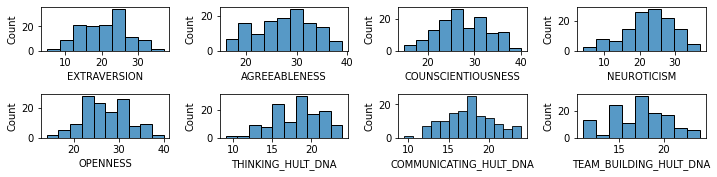

In [49]:
# Using loop to display historgrams for each personality types

loop_lst = ['EXTRAVERSION','AGREEABLENESS','COUNSCIENTIOUSNESS','NEUROTICISM',
            'OPENNESS', 'THINKING_HULT_DNA','COMMUNICATING_HULT_DNA','TEAM_BUILDING_HULT_DNA']

# setting figure size
fig, ax = plt.subplots(figsize = (10, 60))


# initializing a counter
count = 0


# looping to create visualizations
for col in loop_lst:

    # condition to break
    if count == len(loop_lst):
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(50, 4, count)
    sns.histplot(x = survey_copy.loc[:,col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
#plt.savefig('./analysis_images/customers_df_histograms.png')
plt.show()

In [50]:
# looping to logarithmically transform non-demographic features

for col in loop_lst:

    survey_copy['log_'+col] = np.log(survey_copy.loc[:,col])
    

# checking results
survey_copy.columns

Index(['ID', 'LIFE_OF_PARTY', 'LIL_CONCERN_FOR_OTHERS', 'ALWAYS_PREPARED', 'STRESSED_EASILY', 'RICH_VOCAB', 'TALK_LESS', 'INTEREST_IN_PPL', 'MESSY', 'RELAXED',
       ...
       'COUNT_TEAM_BUILDING_HULT_DNA', 'HULT_DNA_PERSONALITY', 'log_EXTRAVERSION', 'log_AGREEABLENESS', 'log_COUNSCIENTIOUSNESS', 'log_NEUROTICISM', 'log_OPENNESS', 'log_THINKING_HULT_DNA', 'log_COMMUNICATING_HULT_DNA', 'log_TEAM_BUILDING_HULT_DNA'], dtype='object', length=110)

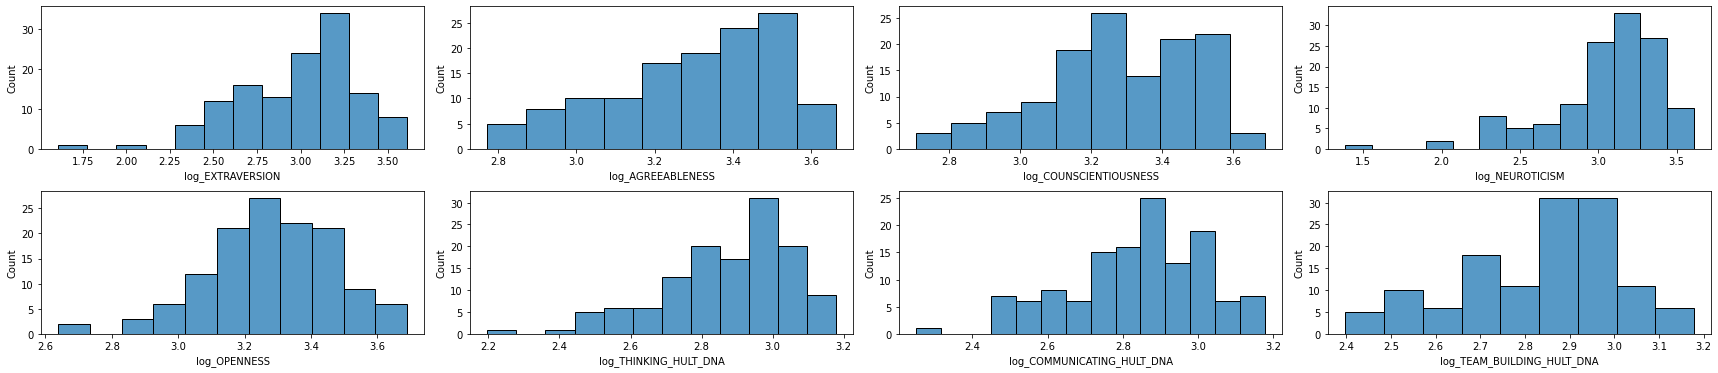

In [51]:
# Using loop to display historgram for each log-transformed personality types

loop_lst = ['log_EXTRAVERSION','log_AGREEABLENESS','log_COUNSCIENTIOUSNESS','log_NEUROTICISM',
            'log_OPENNESS', 'log_THINKING_HULT_DNA','log_COMMUNICATING_HULT_DNA','log_TEAM_BUILDING_HULT_DNA']

# setting figure size
fig, ax = plt.subplots(figsize = (24, 100))


# initializing a counter
count = 0


# looping to create visualizations
for col in loop_lst:

    # condition to break
    if count == len(loop_lst):
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(39, 4, count)
    sns.histplot(x = survey_copy[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
#plt.savefig('./analysis_images/customers_df_histograms.png')
plt.show()

<h2>Drop and scale data</h2>

In [52]:
# Hult Version
# scaling (normalizing) variables before correlation analysis

# dropping unnecessary information
hult_laptop_behavior = survey_copy.drop(['ID', 'LIFE_OF_PARTY', 'LIL_CONCERN_FOR_OTHERS', 
                                    'ALWAYS_PREPARED', 'STRESSED_EASILY', 'RICH_VOCAB', 
                                    'TALK_LESS', 'INTEREST_IN_PPL', 'MESSY', 'RELAXED', 
                                    'DIFF_W_ABSTRACT_IDEA', 'COMFT_W_PPL', 'INSULTING', 
                                    'DETAIL_ORIENTED', 'WORRIER', 'CREATIVE', 'INTROVERT', 
                                    'SYMPATHETIC', 'MAKE_A_MESS', 'OPTMIST', 'NOT_INT_IN_ABSTRACT', 
                                    'CONV_STARTER', 'LACK_OF_SYMPATHY', 'PROACTIVE', 'EASILY_DIST', 
                                    'INNOVATIVE', 'LITTLE_TO_SAY', 'SOFT_HEART', 'FORGETFUL', 'SENSITIVE', 
                                    'NOT_CREATIVE', 'SOCIAL', 'EGOCENTRIC', 'ORGANIZED', 'MOODY', 'WITTY', 
                                    'SHY', 'EMPATHETIC', 'LAZY', '2_MOODY', 'ELOQUENT', 'CENTER_OF_ATTENTION',
                                    '2_EMPATHETIC', 'PUNCTUAL', 'GRUMPY', 'REFLECTIVE', 'AMBIVERT', 'COOL',
                                    'PERFECTIONIST', 'SAD', 'IMAGINATIVE', 'PATTERN_OBSERVANT_HULT', 
                                    'TRADITIONAL', 'SELF_AWARE_HULT', 'GROWTH_MINDSET_HULT', 'MULTI_TASKER',
                                    'INITIATOR', 'OPEN_DISCUSSIONS', 'MULTI_TASKER_2', 'INITIATOR_2',
                                    'OPEN_DISCUSSIONS_2', 'ACTIVE_LISTENER_HULT', 'ORGANIC_INFLUENCER',
                                    'AFFILIATOR_HULT', 'DIVERSE_TOLERANT_HULT','NEGOTIATOR', 'NOT_LEADER', 
                                    'STRATEGIC_PLANNER', 'PROBLEM_SOLVER_HULT', 'FEEDBACK_FRUITS_HULT', 
                                    'MENTOR_HULT', 'RESULTS_DRIVEN_HULT', 'CURRENT_LAPTOP', 'FUTURE_LAPTOP', 
                                    'PROGRAM_HULT', 'GENDER', 'NATIONALITY', 'ETHNICITY',
                                    'COUNT_EXTRAVERSION', 'COUNT_AGREEABLENESS', 'AGE',
                                    'COUNT_COUNSCIENTIOUSNESS', 'COUNT_NEUROTICISM', 'COUNT_OPENNESS',  
                                    'COUNT_THINKING_HULT_DNA', 'COUNT_COMMUNICATING_HULT_DNA', 
                                    'COUNT_TEAM_BUILDING_HULT_DNA', 'AVG_MULTI_TASKER', 'AVG_OPEN_DISCUSSIONS',
                                    'AVG_INITIATOR','HULT_DNA_PERSONALITY','BIG_5_PERSONALITY',
                                    'THINKING_HULT_DNA', 'COMMUNICATING_HULT_DNA', 'TEAM_BUILDING_HULT_DNA',
                                    'EXTRAVERSION','AGREEABLENESS','COUNSCIENTIOUSNESS','NEUROTICISM',
                                    'OPENNESS', 'log_EXTRAVERSION','log_AGREEABLENESS',
                                    'log_COUNSCIENTIOUSNESS','log_NEUROTICISM','log_OPENNESS',
                                    'CHANGE_LAPTOP','NO_CHANGE_LAPTOP'],
                                      axis = 1)

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_laptop_behavior)


# TRANSFORMING our data after fit
hult_X_scaled = scaler.transform(hult_laptop_behavior)


# converting scaled data into a DataFrame
hult_laptop_scaled = pd.DataFrame(hult_X_scaled)


# reattaching column names
hult_laptop_scaled.columns = hult_laptop_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(hult_laptop_behavior), '\n\n')
print(pd.np.var(hult_laptop_scaled))

log_THINKING_HULT_DNA         0.034866
log_COMMUNICATING_HULT_DNA    0.031461
log_TEAM_BUILDING_HULT_DNA    0.035221
dtype: float64 


log_THINKING_HULT_DNA         1.0
log_COMMUNICATING_HULT_DNA    1.0
log_TEAM_BUILDING_HULT_DNA    1.0
dtype: float64


<ipython-input-52-ff8579c14882>:57: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_laptop_behavior), '\n\n')
<ipython-input-52-ff8579c14882>:58: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_laptop_scaled))


In [53]:
# Big5 Version
# scaling (normalizing) variables before correlation analysis

# dropping unnecessary information
big5_laptop_behavior = survey_copy.drop(['ID', 'LIFE_OF_PARTY', 'LIL_CONCERN_FOR_OTHERS', 
                                    'ALWAYS_PREPARED', 'STRESSED_EASILY', 'RICH_VOCAB', 
                                    'TALK_LESS', 'INTEREST_IN_PPL', 'MESSY', 'RELAXED', 
                                    'DIFF_W_ABSTRACT_IDEA', 'COMFT_W_PPL', 'INSULTING', 
                                    'DETAIL_ORIENTED', 'WORRIER', 'CREATIVE', 'INTROVERT', 
                                    'SYMPATHETIC', 'MAKE_A_MESS', 'OPTMIST', 'NOT_INT_IN_ABSTRACT', 
                                    'CONV_STARTER', 'LACK_OF_SYMPATHY', 'PROACTIVE', 'EASILY_DIST', 
                                    'INNOVATIVE', 'LITTLE_TO_SAY', 'SOFT_HEART', 'FORGETFUL', 'SENSITIVE', 
                                    'NOT_CREATIVE', 'SOCIAL', 'EGOCENTRIC', 'ORGANIZED', 'MOODY', 'WITTY', 
                                    'SHY', 'EMPATHETIC', 'LAZY', '2_MOODY', 'ELOQUENT', 'CENTER_OF_ATTENTION',
                                    '2_EMPATHETIC', 'PUNCTUAL', 'GRUMPY', 'REFLECTIVE', 'AMBIVERT', 'COOL',
                                    'PERFECTIONIST', 'SAD', 'IMAGINATIVE', 'PATTERN_OBSERVANT_HULT', 
                                    'TRADITIONAL', 'SELF_AWARE_HULT', 'GROWTH_MINDSET_HULT', 'MULTI_TASKER',
                                    'INITIATOR', 'OPEN_DISCUSSIONS', 'MULTI_TASKER_2', 'INITIATOR_2',
                                    'OPEN_DISCUSSIONS_2', 'ACTIVE_LISTENER_HULT', 'ORGANIC_INFLUENCER',
                                    'AFFILIATOR_HULT', 'DIVERSE_TOLERANT_HULT','NEGOTIATOR', 'NOT_LEADER', 
                                    'STRATEGIC_PLANNER', 'PROBLEM_SOLVER_HULT', 'FEEDBACK_FRUITS_HULT', 
                                    'MENTOR_HULT', 'RESULTS_DRIVEN_HULT', 'CURRENT_LAPTOP', 'FUTURE_LAPTOP', 
                                    'PROGRAM_HULT', 'GENDER', 'NATIONALITY', 'ETHNICITY',
                                    'COUNT_EXTRAVERSION', 'COUNT_AGREEABLENESS', 'AGE',
                                    'COUNT_COUNSCIENTIOUSNESS', 'COUNT_NEUROTICISM', 'COUNT_OPENNESS',  
                                    'COUNT_THINKING_HULT_DNA', 'COUNT_COMMUNICATING_HULT_DNA', 
                                    'COUNT_TEAM_BUILDING_HULT_DNA', 'AVG_MULTI_TASKER', 'AVG_OPEN_DISCUSSIONS',
                                    'AVG_INITIATOR','HULT_DNA_PERSONALITY','BIG_5_PERSONALITY',
                                    'THINKING_HULT_DNA', 'COMMUNICATING_HULT_DNA', 'TEAM_BUILDING_HULT_DNA',
                                    'EXTRAVERSION','AGREEABLENESS','COUNSCIENTIOUSNESS','NEUROTICISM',
                                    'OPENNESS','log_THINKING_HULT_DNA','log_COMMUNICATING_HULT_DNA',
                                    'log_TEAM_BUILDING_HULT_DNA','CHANGE_LAPTOP','NO_CHANGE_LAPTOP'],
                                      axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big5_laptop_behavior)


# TRANSFORMING our data after fit
big5_X_scaled = scaler.transform(big5_laptop_behavior)


# converting scaled data into a DataFrame
big5_laptop_scaled = pd.DataFrame(big5_X_scaled)


# reattaching column names
big5_laptop_scaled.columns = big5_laptop_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(big5_laptop_behavior), '\n\n')
print(pd.np.var(big5_laptop_scaled))

log_EXTRAVERSION          0.116335
log_AGREEABLENESS         0.046110
log_COUNSCIENTIOUSNESS    0.042713
log_NEUROTICISM           0.136873
log_OPENNESS              0.038813
dtype: float64 


log_EXTRAVERSION          1.0
log_AGREEABLENESS         1.0
log_COUNSCIENTIOUSNESS    1.0
log_NEUROTICISM           1.0
log_OPENNESS              1.0
dtype: float64


<ipython-input-53-8fd93ec84bde>:57: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big5_laptop_behavior), '\n\n')
<ipython-input-53-8fd93ec84bde>:58: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big5_laptop_scaled))


In [54]:
# Hult version

# setting plot size
#fig, ax = plt.subplots(figsize = (10, 10))


# developing a correlation matrix object
#hult_df_corr = hult_laptop_scaled.corr(method = 'pearson').round(2)


# creating a correlation heatmap
#sns.heatmap(hult_df_corr,
#            cmap = 'coolwarm',
#            square = True,
#            annot = True)


# saving and displaying the heatmap
#plt.savefig('top_customers_correlation_heatmap.png')
#plt.show()


In [55]:
# Big5 version

# setting plot size
#fig, ax = plt.subplots(figsize = (10, 10))


# developing a correlation matrix object
#big5_df_corr = big5_laptop_scaled.corr(method = 'pearson').round(2)


# creating a correlation heatmap
#sns.heatmap(big5_df_corr,
#            cmap = 'coolwarm',
#            square = True,
#            annot = True)


# saving and displaying the heatmap
#plt.savefig('top_customers_correlation_heatmap.png')
#plt.show()


<h2>Principal Component Analysis</h2>

In [56]:
# Hult version
# INSTANTIATING a PCA object with no limit to principal components
hult_pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
hult_customer_pca = hult_pca.fit_transform(hult_laptop_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", hult_X_scaled.shape)
print("PCA shape     :",  hult_customer_pca.shape)

Original shape: (129, 3)
PCA shape     : (129, 3)


In [57]:
# Big5 version
# INSTANTIATING a PCA object with no limit to principal components
big5_pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
big5_customer_pca = big5_pca.fit_transform(big5_laptop_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", big5_X_scaled.shape)
print("PCA shape     :",  big5_customer_pca.shape)

Original shape: (129, 5)
PCA shape     : (129, 5)


In [58]:
# Hult version
# INSTANTIATING a new model using the first three principal components
hult_pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_customer_pca_3 = hult_pca_3.fit_transform(hult_laptop_scaled)


In [59]:
# Big5 version
# INSTANTIATING a new model using the first three principal components
big5_pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
big5_customer_pca_3 = big5_pca_3.fit_transform(big5_laptop_scaled)



In [60]:
# Hult version
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
hult_factor_loadings = pd.DataFrame(pd.np.transpose(hult_pca.components_))


# naming rows as original features
hult_factor_loadings = hult_factor_loadings.set_index(hult_laptop_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
hult_factor_loadings_3 = pd.DataFrame(pd.np.transpose(hult_pca_3.components_))


# naming rows as original features
hult_factor_loadings_3 = hult_factor_loadings_3.set_index(hult_laptop_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{hult_factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{hult_factor_loadings_3.round(2)}
""")



MAX Components Factor Loadings
------------------------------
                               0     1     2
log_THINKING_HULT_DNA      -0.58 -0.31  0.75
log_COMMUNICATING_HULT_DNA -0.58 -0.48 -0.66
log_TEAM_BUILDING_HULT_DNA -0.57  0.82 -0.10


3 Components Factor Loadings
------------------------------
                               0     1     2
log_THINKING_HULT_DNA      -0.58 -0.31  0.75
log_COMMUNICATING_HULT_DNA -0.58 -0.48 -0.66
log_TEAM_BUILDING_HULT_DNA -0.57  0.82 -0.10



<ipython-input-60-30e6f19fa2e5>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hult_factor_loadings = pd.DataFrame(pd.np.transpose(hult_pca.components_))
<ipython-input-60-30e6f19fa2e5>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hult_factor_loadings_3 = pd.DataFrame(pd.np.transpose(hult_pca_3.components_))


In [61]:
# Big 5 version
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
big5_factor_loadings = pd.DataFrame(pd.np.transpose(big5_pca.components_))


# naming rows as original features
big5_factor_loadings = big5_factor_loadings.set_index(big5_laptop_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
big5_factor_loadings_3 = pd.DataFrame(pd.np.transpose(big5_pca_3.components_))


# naming rows as original features
big5_factor_loadings_3 = big5_factor_loadings_3.set_index(big5_laptop_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{big5_factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{big5_factor_loadings_3.round(2)}
""")




MAX Components Factor Loadings
------------------------------
                           0     1     2     3     4
log_EXTRAVERSION       -0.32  0.65 -0.58 -0.20 -0.32
log_AGREEABLENESS      -0.54  0.13  0.29 -0.52  0.58
log_COUNSCIENTIOUSNESS -0.52 -0.41  0.26 -0.17 -0.68
log_NEUROTICISM        -0.31 -0.58 -0.68  0.13  0.30
log_OPENNESS           -0.48  0.25  0.21  0.81  0.10


3 Components Factor Loadings
------------------------------
                           0     1     2
log_EXTRAVERSION       -0.32  0.65 -0.58
log_AGREEABLENESS      -0.54  0.13  0.29
log_COUNSCIENTIOUSNESS -0.52 -0.41  0.26
log_NEUROTICISM        -0.31 -0.58 -0.68
log_OPENNESS           -0.48  0.25  0.21



<ipython-input-61-50c0dc8b30c0>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  big5_factor_loadings = pd.DataFrame(pd.np.transpose(big5_pca.components_))
<ipython-input-61-50c0dc8b30c0>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  big5_factor_loadings_3 = pd.DataFrame(pd.np.transpose(big5_pca_3.components_))


In [62]:
# Hult version
# component number counter
component_number = 0

# looping over each principal component
for variance in hult_pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")
    
    

PC 1 : 0.775
PC 2 : 0.122
PC 3 : 0.103


In [63]:
# Big 5 version
# component number counter
component_number = 0

# looping over each principal component
for variance in big5_pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")
    
    

PC 1 : 0.348
PC 2 : 0.202
PC 3 : 0.186
PC 4 : 0.149
PC 5 : 0.116


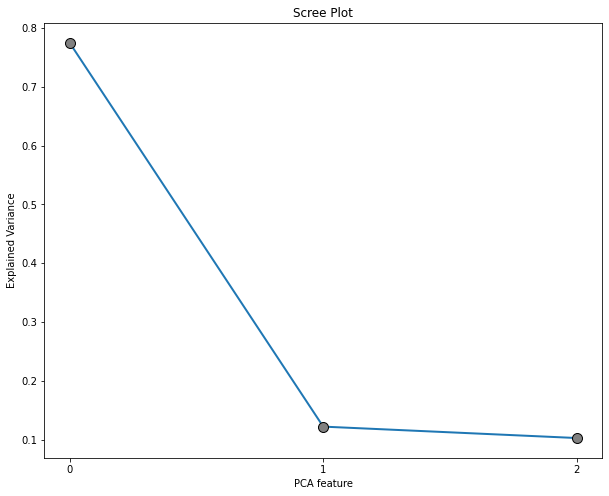

In [64]:
# Hult version
# printing the sum of all explained variance ratios
scree_plot(pca_object = hult_pca)

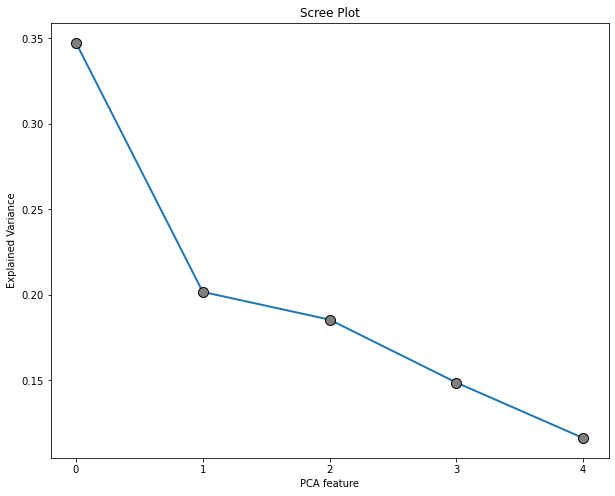

In [65]:
# Big 5 version
# printing the sum of all explained variance ratios
scree_plot(pca_object = big5_pca)

In [66]:
# Hult version
# calling the scree_plot function
print(f'''
The sum of the explained variance ratio for HULT version is {hult_pca.explained_variance_ratio_[:2].sum().round(3)}.
The individual explained variance ratio for HULT version are {hult_pca.explained_variance_ratio_.round(3)}.''')


The sum of the explained variance ratio for HULT version is 0.897.
The individual explained variance ratio for HULT version are [0.775 0.122 0.103].


In [67]:
# Big 5 version
# calling the scree_plot function
print(f'''
The sum of the explained variance ratio for Big 5 version is {big5_pca.explained_variance_ratio_[:3].sum().round(3)}.
The individual explained variance ratio for Big 5 version are {big5_pca.explained_variance_ratio_.round(3)}.''')


The sum of the explained variance ratio for Big 5 version is 0.735.
The individual explained variance ratio for Big 5 version are [0.348 0.202 0.186 0.149 0.116].


In [68]:
# Hult version
hult_no_lst = []
hult_PC_lst = []
for i in range (0,len(hult_laptop_behavior.keys())):
    hult_no_lst.append(i)
    hult_PC_lst.append("PC "+str(i))
    

In [69]:
# Big 5 version
big5_no_lst = []
big5_PC_lst = []
for i in range (0,len(big5_laptop_behavior.keys())):
    big5_no_lst.append(i)
    big5_PC_lst.append("PC "+str(i))
    

In [70]:
# Hult version
# setting plot size
#fig, ax = plt.subplots(figsize = (10, 10))

# developing a PC to feature heatmap
#sns.heatmap(hult_pca.components_, 
#            cmap = 'coolwarm',
#            square = True,
#            annot = True,
#            linewidths = 0.1,
#            linecolor = 'black')


# setting more plot options
#plt.yticks(hult_no_lst,
#           hult_PC_lst)

#plt.xticks(range(0, 3),
#           hult_laptop_behavior,
#           rotation=60,
#           ha='left')


#plt.xlabel(xlabel = "Feature")
#plt.ylabel(ylabel = "Principal Component")


# displaying the plot
#plt.show()

In [71]:
# Big 5 verseion
# setting plot size
#fig, ax = plt.subplots(figsize = (10, 10))

# developing a PC to feature heatmap
#sns.heatmap(big5_pca.components_, 
#            cmap = 'coolwarm',
#            square = True,
#            annot = True,
#            linewidths = 0.1,
#            linecolor = 'black')


# setting more plot options
#plt.yticks(big5_no_lst,
#           big5_PC_lst)

#plt.xticks(range(0, 5),
#           big5_laptop_behavior,
#           rotation=60,
#           ha='left')


#plt.xlabel(xlabel = "Feature")
#plt.ylabel(ylabel = "Principal Component")


# displaying the plot
#plt.show()




In [72]:
# Hult version
# transposing pca components
hult_factor_loadings_df = pd.DataFrame(pd.np.transpose(hult_pca.components_))


# naming rows as original features
hult_factor_loadings_df = hult_factor_loadings_df.set_index(hult_laptop_scaled.columns)


# checking the result
hult_factor_loadings_df


# saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

<ipython-input-72-895e46b320c5>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hult_factor_loadings_df = pd.DataFrame(pd.np.transpose(hult_pca.components_))


,0,1,2
log_THINKING_HULT_DNA,-0.583183,-0.314620,0.748941
log_COMMUNICATING_HULT_DNA,-0.579811,-0.484521,-0.655026
log_TEAM_BUILDING_HULT_DNA,-0.568962,0.816244,-0.100145


In [73]:
# Big 5 version
# transposing pca components
big5_factor_loadings_df = pd.DataFrame(pd.np.transpose(big5_pca.components_))


# naming rows as original features
big5_factor_loadings_df = big5_factor_loadings_df.set_index(big5_laptop_scaled.columns)


# checking the result
big5_factor_loadings_df


# saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

<ipython-input-73-2d169dd7547b>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  big5_factor_loadings_df = pd.DataFrame(pd.np.transpose(big5_pca.components_))


,0,1,2,3,4
log_EXTRAVERSION,-0.317051,0.647294,-0.580822,-0.197196,-0.322877
log_AGREEABLENESS,-0.540409,0.131671,0.294497,-0.516709,0.580435
log_COUNSCIENTIOUSNESS,-0.524111,-0.412223,0.260678,-0.169206,-0.677345
log_NEUROTICISM,-0.312388,-0.576774,-0.681446,0.126961,0.298762
log_OPENNESS,-0.484931,0.247141,0.208799,0.805839,0.103872


In [74]:
# Hult version
# naming each principal component
hult_factor_loadings_3.columns = ['Non-thinker',
                                 'Team builder',   
                                 'Dynamic thinker']

# checking the result
hult_factor_loadings_3


,Non-thinker,Team builder,Dynamic thinker
log_THINKING_HULT_DNA,-0.583183,-0.314620,0.748941
log_COMMUNICATING_HULT_DNA,-0.579811,-0.484521,-0.655026
log_TEAM_BUILDING_HULT_DNA,-0.568962,0.816244,-0.100145


In [75]:
# Big 5 version
# naming each principal component
big5_factor_loadings_3.columns = ['Critical',
                                  'Outgoing',
                                  'Relaxed']

# checking the result
big5_factor_loadings_3




,Critical,Outgoing,Relaxed
log_EXTRAVERSION,-0.317051,0.647294,-0.580822
log_AGREEABLENESS,-0.540409,0.131671,0.294497
log_COUNSCIENTIOUSNESS,-0.524111,-0.412223,0.260678
log_NEUROTICISM,-0.312388,-0.576774,-0.681446
log_OPENNESS,-0.484931,0.247141,0.208799


In [76]:
# Hult version
# analyzing factor strengths per customer
hult_X_pca_reduced = hult_pca_3.transform(hult_laptop_scaled)


# converting to a DataFrame
hult_X_pca_df = pd.DataFrame(hult_X_pca_reduced)


# renaming columns
hult_X_pca_df.columns = hult_factor_loadings_3.columns


# checking the results
hult_X_pca_df

,Non-thinker,Team builder,Dynamic thinker
0,-0.184460,0.241638,0.103155
1,-0.512200,0.640052,-0.393407
2,1.145281,-0.010969,0.190238
3,-0.696681,-0.239273,-0.906450
4,2.847021,-0.847116,0.209240
5,1.417399,0.660627,0.684259
6,-0.623970,0.220429,-0.449434
7,-0.503876,0.699880,0.046934
8,0.384973,0.548840,-0.628127
9,-1.477529,-0.240055,0.646732


In [77]:
# Big 5 version
# analyzing factor strengths per customer
big5_X_pca_reduced = big5_pca_3.transform(big5_laptop_scaled)


# converting to a DataFrame
big5_X_pca_df = pd.DataFrame(big5_X_pca_reduced)


# renaming columns
big5_X_pca_df.columns = big5_factor_loadings_3.columns


# checking the results
big5_X_pca_df

,Critical,Outgoing,Relaxed
0,-0.185628,-0.268369,-0.110798
1,0.115183,-0.519110,0.644344
2,0.929879,-0.989794,-1.916092
3,0.005723,0.511781,0.344042
4,1.630278,0.508625,-0.442461
5,2.071333,1.015979,1.239387
6,1.070847,0.915306,0.797079
7,-1.258143,0.033127,-1.067270
8,0.758760,-0.946899,-0.204243
9,-1.604109,-0.388958,0.078128


In [78]:
'''
X_pca_df.to_excel('./analysis_results/PCA Factor Loadings.xlsx',
                  index = False)
'''               

"\nX_pca_df.to_excel('./analysis_results/PCA Factor Loadings.xlsx',\n                  index = False)\n"

<h2>Clustering</h2>

In [79]:
# Hult version
# checking variance amongst clusters
np.var(hult_X_pca_df)


Non-thinker        2.324411
Team builder       0.366905
Dynamic thinker    0.308684
dtype: float64

In [80]:
# Big 5 version
# checking variance amongst clusters
np.var(big5_X_pca_df)



Critical    1.737747
Outgoing    1.008972
Relaxed     0.927843
dtype: float64

In [81]:
# Hult version
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_X_pca_df)


# TRANSFORMING our data after fit
hult_X_scaled_pca = scaler.transform(hult_X_pca_df)


# converting scaled data into a DataFrame
hult_pca_scaled = pd.DataFrame(hult_X_scaled_pca)


# reattaching column names
hult_pca_scaled.columns = ['Non-thinker',
                          'Neurotic',
                          'Introvert']


# checking pre- and post-scaling variance
print(pd.np.var(hult_X_pca_df), '\n\n')
print(pd.np.var(hult_pca_scaled))


Non-thinker        2.324411
Team builder       0.366905
Dynamic thinker    0.308684
dtype: float64 


Non-thinker    1.0
Neurotic       1.0
Introvert      1.0
dtype: float64


<ipython-input-81-e0526bf2ff03>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_X_pca_df), '\n\n')
<ipython-input-81-e0526bf2ff03>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_pca_scaled))


In [82]:
# Big 5 version
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big5_X_pca_df)


# TRANSFORMING our data after fit
big5_X_scaled_pca = scaler.transform(big5_X_pca_df)


# converting scaled data into a DataFrame
big5_pca_scaled = pd.DataFrame(big5_X_scaled_pca)


# reattaching column names
big5_pca_scaled.columns = ['Critical',
                           'Outgoing',
                           'Relaxed']


# checking pre- and post-scaling variance
print(pd.np.var(big5_X_pca_df), '\n\n')
print(pd.np.var(big5_pca_scaled))



Critical    1.737747
Outgoing    1.008972
Relaxed     0.927843
dtype: float64 


Critical    1.0
Outgoing    1.0
Relaxed     1.0
dtype: float64


<ipython-input-82-524ae93272e1>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big5_X_pca_df), '\n\n')
<ipython-input-82-524ae93272e1>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big5_pca_scaled))


<h2>Agglomerative Clustering</h2>

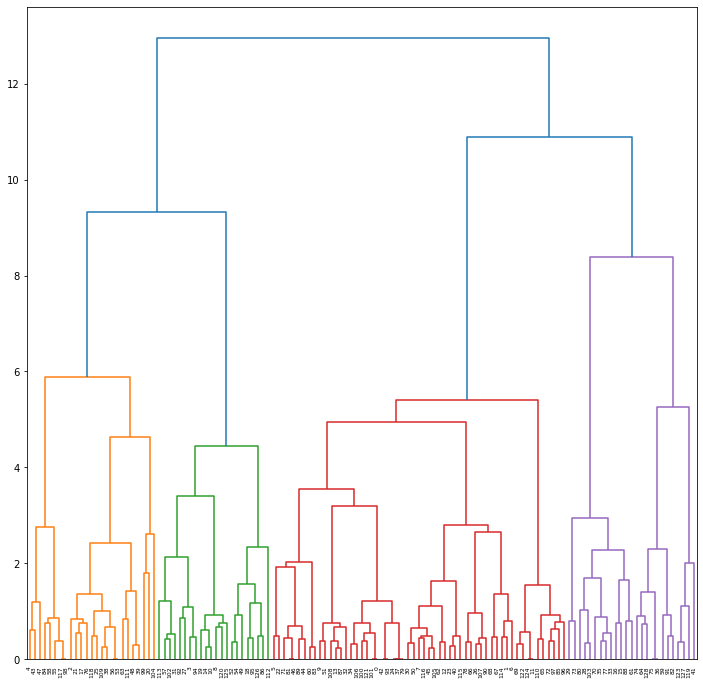

In [83]:
# Hult version
# part 4
# grouping data based on Ward distance
hult_standard_mergings_ward = linkage(y = hult_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = hult_standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
# plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

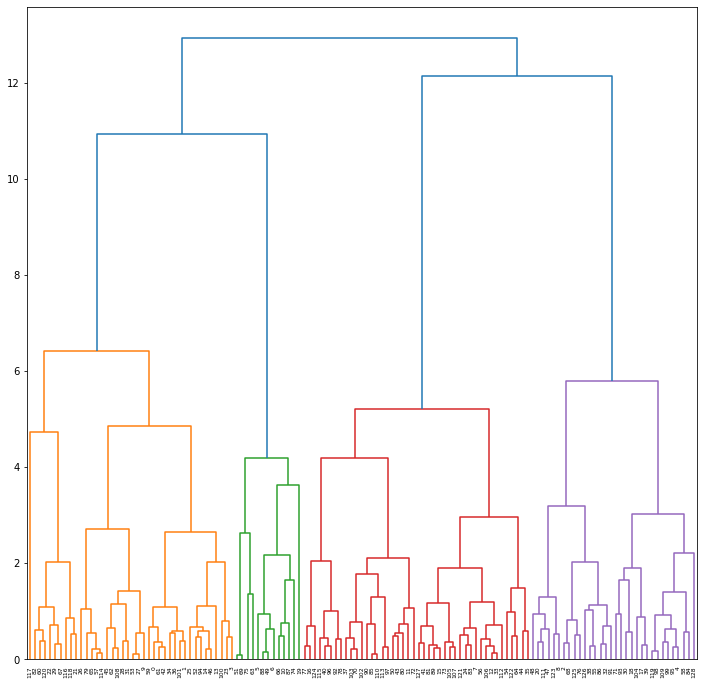

In [84]:
# Big 5 version
# part 4
# grouping data based on Ward distance
big5_standard_mergings_ward = linkage(y = big5_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = big5_standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
# plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

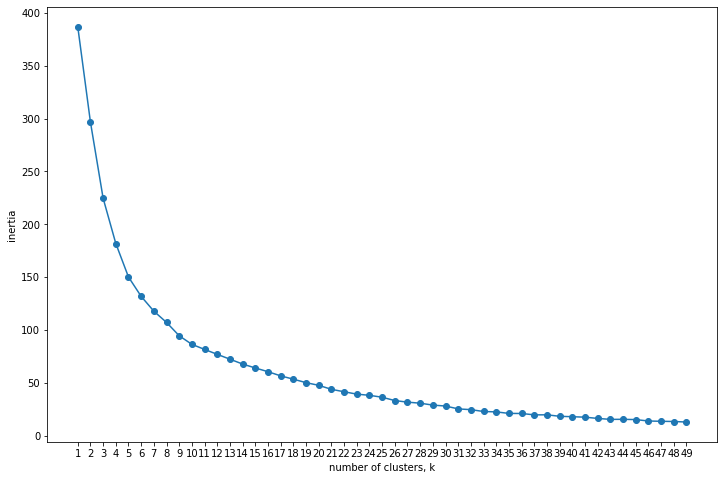

In [85]:
# Hult version
# calling the inertia_plot() function
interia_plot(data = hult_pca_scaled)

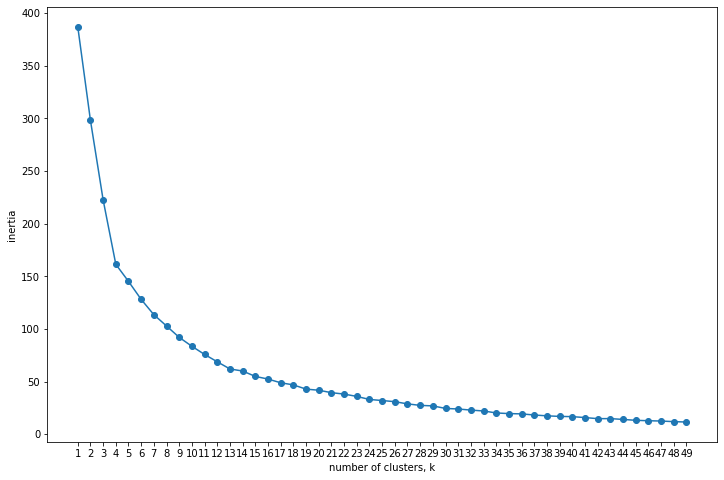

In [86]:
# Big 5 verseion
# calling the inertia_plot() function
interia_plot(data = big5_pca_scaled)

In [87]:
# Hult version
# INSTANTIATING a k-Means object with clusters
hult_customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
hult_customers_k_pca.fit(hult_pca_scaled)


# converting the clusters to a DataFrame
hult_customers_kmeans_pca = pd.DataFrame({'Cluster': hult_customers_k_pca.labels_})


# checking the results
print(hult_customers_kmeans_pca.iloc[: , 0].value_counts())

3    50
2    33
1    27
0    19
Name: Cluster, dtype: int64


In [88]:
# Big 5 version
# INSTANTIATING a k-Means object with clusters
big5_customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
big5_customers_k_pca.fit(big5_pca_scaled)


# converting the clusters to a DataFrame
big5_customers_kmeans_pca = pd.DataFrame({'Cluster': big5_customers_k_pca.labels_})


# checking the results
print(big5_customers_kmeans_pca.iloc[: , 0].value_counts())

3    48
0    34
2    29
1    18
Name: Cluster, dtype: int64


In [89]:
# Hult version
# storing cluster centers
hult_centroids_pca = hult_customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
hult_centroids_pca_df = pd.DataFrame(hult_centroids_pca)


# renaming principal components
hult_centroids_pca_df.columns = ['Non-thinker',
                                 'Neurotic',
                                 'Introvert']

# checking results (clusters = rows, pc = columns)
hult_centroids_pca_df.round(2)

,Non-thinker,Neurotic,Introvert
0,0.41,-1.74,0.07
1,0.07,0.13,1.31
2,0.94,0.49,-0.82
3,-0.81,0.27,-0.19


In [90]:
# Big 5 version
# storing cluster centers
big5_centroids_pca = big5_customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
big5_centroids_pca_df = pd.DataFrame(big5_centroids_pca)


# renaming principal components
big5_centroids_pca_df.columns = ['Critical',
                                 'Outgoing',
                                 'Relaxed']

# checking results (clusters = rows, pc = columns)
big5_centroids_pca_df.round(2)

,Critical,Outgoing,Relaxed
0,0.00,-1.07,0.67
1,0.41,1.15,1.46
2,1.13,0.14,-0.84
3,-0.84,0.24,-0.51


In [91]:
# Hult version
# concatenating cluster memberships with principal components
hult_clst_pca_df = pd.concat([hult_customers_kmeans_pca,
                         hult_X_pca_df],
                         axis = 1)


# checking results
hult_clst_pca_df



# concatenating demographic information with pca-clusters
hult_final_pca_clust_df = pd.concat([survey_copy.loc[ : , ['CURRENT_LAPTOP', 'FUTURE_LAPTOP', 'PROGRAM_HULT', 
                                                      'GENDER', 'NATIONALITY', 'ETHNICITY','BIG_5_PERSONALITY',
                                                      'HULT_DNA_PERSONALITY']],
                                                hult_clst_pca_df],
                                                axis = 1)


# renaming columns
hult_final_pca_clust_df.columns = [
 'CURRENT_LAPTOP', 'FUTURE_LAPTOP', 
 'PROGRAM_HULT', 'GENDER', 'NATIONALITY', 
 'ETHNICITY','BIG_5_PERSONALITY',
 'HULT_DNA_PERSONALITY','Cluster',
 'Non-thinker','Neurotic','Introvert']


# checking the results
hult_final_pca_clust_df.head(n = 5)

,CURRENT_LAPTOP,FUTURE_LAPTOP,PROGRAM_HULT,GENDER,NATIONALITY,ETHNICITY,BIG_5_PERSONALITY,HULT_DNA_PERSONALITY,Cluster,Non-thinker,Neurotic,Introvert
0,macbook,macbook,dd (mib & business analytics),female,Ecuadorian,hispanic / latino,counscientiousness,thinking,3.0,-0.184460,0.241638,0.103155
1,windows,windows,one year business analytics,male,Ecuadorian,hispanic / latino,openness,team building,3.0,-0.512200,0.640052,-0.393407
2,windows,windows,one year business analytics,male,Indian,west asian / indian,neuroticism,thinking,1.0,1.145281,-0.010969,0.190238
3,windows,windows,one year business analytics,female,Indian,west asian / indian,agreeableness,communicating,3.0,-0.696681,-0.239273,-0.906450
4,macbook,windows,dd (mba & disruptive innovation),male,Chinese,far east asian,openness,thinking,0.0,2.847021,-0.847116,0.209240


In [92]:
# Big 5 version
# concatenating cluster memberships with principal components
big5_clst_pca_df = pd.concat([big5_customers_kmeans_pca,
                         big5_X_pca_df],
                         axis = 1)


# checking results
big5_clst_pca_df



# concatenating demographic information with pca-clusters
big5_final_pca_clust_df = pd.concat([survey_copy.loc[ : , ['CURRENT_LAPTOP', 'FUTURE_LAPTOP', 'PROGRAM_HULT', 
                                                      'GENDER', 'NATIONALITY', 'ETHNICITY','BIG_5_PERSONALITY',
                                                      'HULT_DNA_PERSONALITY']],
                                                big5_clst_pca_df],
                                                axis = 1)


# renaming columns
big5_final_pca_clust_df.columns = [
 'CURRENT_LAPTOP', 'FUTURE_LAPTOP', 
 'PROGRAM_HULT','GENDER', 'NATIONALITY', 
 'ETHNICITY','BIG_5_PERSONALITY',
 'HULT_DNA_PERSONALITY','Cluster',
 'Critical','Outgoing','Relaxed']


# checking the results
big5_final_pca_clust_df.head(n = 5)


,CURRENT_LAPTOP,FUTURE_LAPTOP,PROGRAM_HULT,GENDER,NATIONALITY,ETHNICITY,BIG_5_PERSONALITY,HULT_DNA_PERSONALITY,Cluster,Critical,Outgoing,Relaxed
0,macbook,macbook,dd (mib & business analytics),female,Ecuadorian,hispanic / latino,counscientiousness,thinking,3.0,-0.185628,-0.268369,-0.110798
1,windows,windows,one year business analytics,male,Ecuadorian,hispanic / latino,openness,team building,0.0,0.115183,-0.519110,0.644344
2,windows,windows,one year business analytics,male,Indian,west asian / indian,neuroticism,thinking,2.0,0.929879,-0.989794,-1.916092
3,windows,windows,one year business analytics,female,Indian,west asian / indian,agreeableness,communicating,3.0,0.005723,0.511781,0.344042
4,macbook,windows,dd (mba & disruptive innovation),male,Chinese,far east asian,openness,thinking,2.0,1.630278,0.508625,-0.442461


In [93]:
# Hult version
# renaming regions
hult_cluster_names = {0 : 'Cluster 1',
                      1 : 'Cluster 2',
                      2 : 'Cluster 3',
                      3 : 'Cluster 4'}


hult_final_pca_clust_df['Cluster'].replace(hult_cluster_names, inplace = True)


# adding a productivity step
hult_data_df = hult_final_pca_clust_df


# checking results
hult_data_df.head(n = 5)


,CURRENT_LAPTOP,FUTURE_LAPTOP,PROGRAM_HULT,GENDER,NATIONALITY,ETHNICITY,BIG_5_PERSONALITY,HULT_DNA_PERSONALITY,Cluster,Non-thinker,Neurotic,Introvert
0,macbook,macbook,dd (mib & business analytics),female,Ecuadorian,hispanic / latino,counscientiousness,thinking,Cluster 4,-0.184460,0.241638,0.103155
1,windows,windows,one year business analytics,male,Ecuadorian,hispanic / latino,openness,team building,Cluster 4,-0.512200,0.640052,-0.393407
2,windows,windows,one year business analytics,male,Indian,west asian / indian,neuroticism,thinking,Cluster 2,1.145281,-0.010969,0.190238
3,windows,windows,one year business analytics,female,Indian,west asian / indian,agreeableness,communicating,Cluster 4,-0.696681,-0.239273,-0.906450
4,macbook,windows,dd (mba & disruptive innovation),male,Chinese,far east asian,openness,thinking,Cluster 1,2.847021,-0.847116,0.209240


In [94]:
# Big 5 version
# renaming regions
big5_cluster_names = {0 : 'Cluster 1',
                      1 : 'Cluster 2',
                      2 : 'Cluster 3',
                      3 : 'Cluster 4'}


big5_final_pca_clust_df['Cluster'].replace(big5_cluster_names, inplace = True)


# adding a productivity step
big5_data_df = big5_final_pca_clust_df


# checking results
big5_data_df.head(n = 5)



,CURRENT_LAPTOP,FUTURE_LAPTOP,PROGRAM_HULT,GENDER,NATIONALITY,ETHNICITY,BIG_5_PERSONALITY,HULT_DNA_PERSONALITY,Cluster,Critical,Outgoing,Relaxed
0,macbook,macbook,dd (mib & business analytics),female,Ecuadorian,hispanic / latino,counscientiousness,thinking,Cluster 4,-0.185628,-0.268369,-0.110798
1,windows,windows,one year business analytics,male,Ecuadorian,hispanic / latino,openness,team building,Cluster 1,0.115183,-0.519110,0.644344
2,windows,windows,one year business analytics,male,Indian,west asian / indian,neuroticism,thinking,Cluster 3,0.929879,-0.989794,-1.916092
3,windows,windows,one year business analytics,female,Indian,west asian / indian,agreeableness,communicating,Cluster 4,0.005723,0.511781,0.344042
4,macbook,windows,dd (mba & disruptive innovation),male,Chinese,far east asian,openness,thinking,Cluster 3,1.630278,0.508625,-0.442461


<body>
<h2>Demographics</h2>
    
<h3>PCA Analysis</h3>

The scree plot showed that our clusters, starting from cluster 2 would have higher variance. The sum of explained variance ratio for the HULT clusters is 0.897 and for the Big Five clusters is 0.735. This indicates that the clusters have different personas in them.

Another sign that our data is not normally distributed are our plots, which show skewness, that is, they are not symmetric. This is common in real-life data and surveys because they reflect the differences in responses. 

In terms of Hult DNA personalities, cluster 2 is highly correlated with the thinking personality types (0.75) which demonstrates a higher presence of that personality type in this cluster. This cluster was named Dynamic Thinkers. The same applies to cluster 1 and the team-building personality type (0.82), named Team Builder. Cluster 0 was mostly negatively correlated with all three personality domains, and it was named Non-Thinker.

For the Big Five personalities, the biggest correlations are between cluster 1 and extraversion (0.65), and this cluster was named Outgoing. Cluster 0 was mainly negatively correlated, especially with agreeableness therefore it was named Critical. Finally, Cluster 2 was negatively related (-0.68) with neuroticism and named Relaxed.  Other personality traits were present as well, but these were the dominant ones in the most relevant clusters.    
</body>    
<h3>Gender vs Cluster</h3>

In [95]:
# Hult version
########################
# Gender
########################

# Non-thinker
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'GENDER',
#            y = 'Non-thinker',
#            hue = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [96]:
# Big 5 version
########################
# Gender
########################

# Critical
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'GENDER',
#            y = 'Critical',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [97]:
# Hult version
########################
# Gender
########################

# Neurotic
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'GENDER',
#            y    = 'Neurotic',
#            hue  = 'Cluster',
#           data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [98]:
# Big 5 version
########################
# Gender
########################

# Outgoing
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'GENDER',
#            y = 'Outgoing',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [99]:
# Hult version
########################
# Gender
########################

# Introvert
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'GENDER',
#            y = 'Introvert',
#            hue = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [100]:
# Big 5 version
########################
# Gender
########################

# Relaxed
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'GENDER',
#            y = 'Relaxed',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

<h3>Hult program vs Cluster</h3>

In [101]:
# Hult version
########################
# Hult Program
########################

# Non-thinker
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'PROGRAM_HULT',
#            y    = 'Non-thinker',
#            hue  = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [102]:
# Big 5 version
########################
# Hult Program
########################

# Critical
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'PROGRAM_HULT',
#            y = 'Critical',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [103]:
# Hult version
########################
# Hult Program
########################

# Neurotic
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'PROGRAM_HULT',
#            y    = 'Neurotic',
#            hue  = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [104]:
# Big 5 version
########################
# Hult Program
########################

# Outgoing
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'PROGRAM_HULT',
#            y = 'Outgoing',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [105]:
# Hult version
########################
# Hult Program
########################

# Introvert
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'PROGRAM_HULT',
#            y = 'Introvert',
#            hue = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [106]:
# Big 5 version
########################
# Hult Program
########################

# Relaxed
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'PROGRAM_HULT',
#            y = 'Relaxed',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

<h3>Current Laptop vs Cluster</h3>

In [107]:
# Hult version
########################
# Current Laptop
########################   

# Non-thinker
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'CURRENT_LAPTOP',
#            y    = 'Non-thinker',
#            hue  = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [108]:
# Big 5 version
########################
# Current Laptop
########################

# Critial
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'CURRENT_LAPTOP',
#            y = 'Critical',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [109]:
# Hult version
########################
# Current Laptop
########################

# Neurotic
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'CURRENT_LAPTOP',
#            y    = 'Neurotic',
#            hue  = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [110]:
# Big 5 version
########################
# Current Laptop
########################

# Outgoing
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'CURRENT_LAPTOP',
#            y = 'Outgoing',
#            hue = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [111]:
# Hult version
########################
# Current Laptop
########################

# Introvert
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'CURRENT_LAPTOP',
#            y = 'Introvert',
#            hue = 'Cluster',
#            data = hult_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

In [112]:
# Big 5 version
########################
# Current Laptop
########################

# Relaxed
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'CURRENT_LAPTOP',
#            y    = 'Relaxed',
#            hue  = 'Cluster',
#            data = big5_data_df)


# formatting and displaying the plot
#plt.tight_layout()
#plt.show()

<h3>Future laptop vs Cluster</h3>

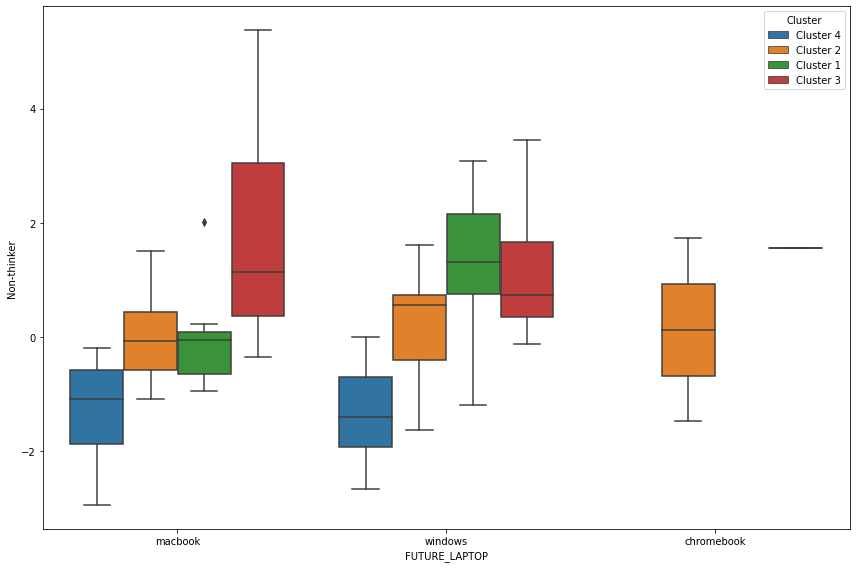

In [113]:
# Hult version
########################
# Future laptop
########################

# Non-thinker
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'FUTURE_LAPTOP',
            y    = 'Non-thinker',
            hue  = 'Cluster',
            data = hult_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

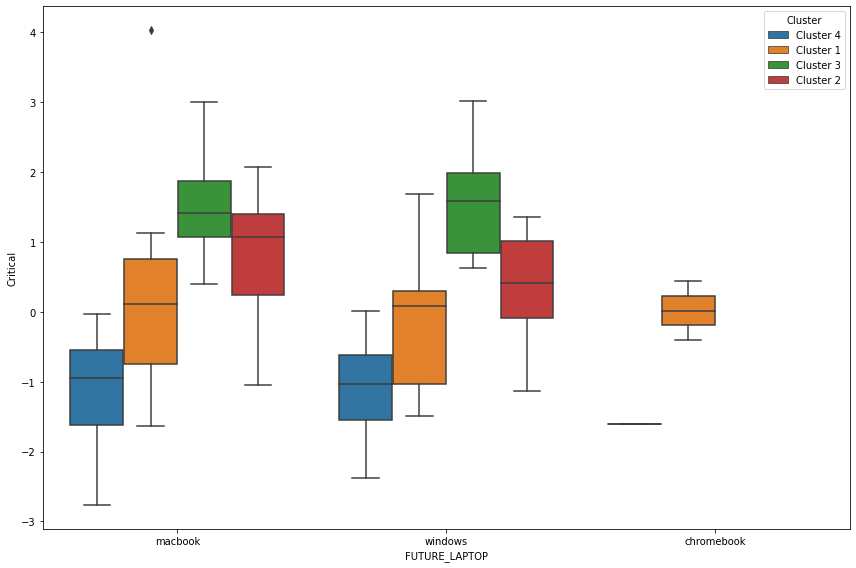

In [114]:
# Big 5 version
########################
# Current Laptop
########################

# Critial
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'FUTURE_LAPTOP',
            y = 'Critical',
            hue = 'Cluster',
            data = big5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

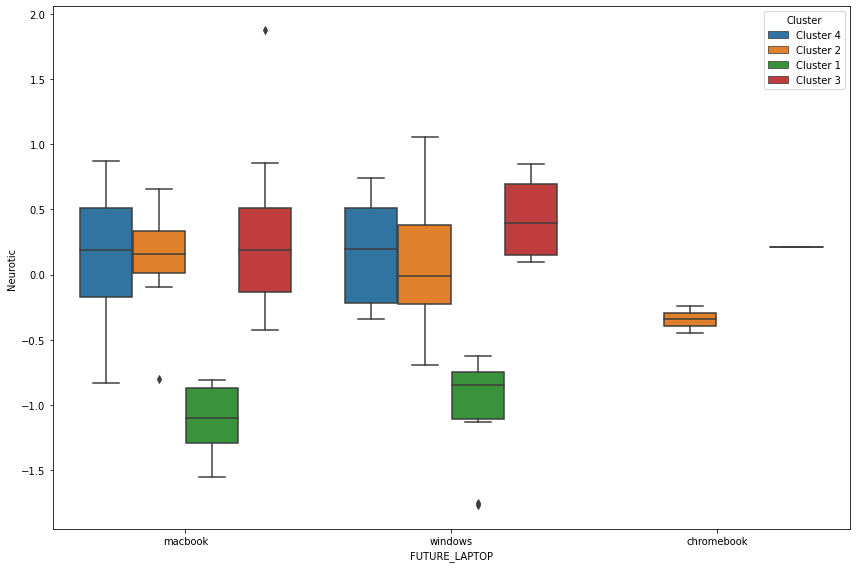

In [115]:
#Hult version
########################
# Future laptop
########################

# Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'FUTURE_LAPTOP',
            y    = 'Neurotic',
            hue  = 'Cluster',
            data = hult_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

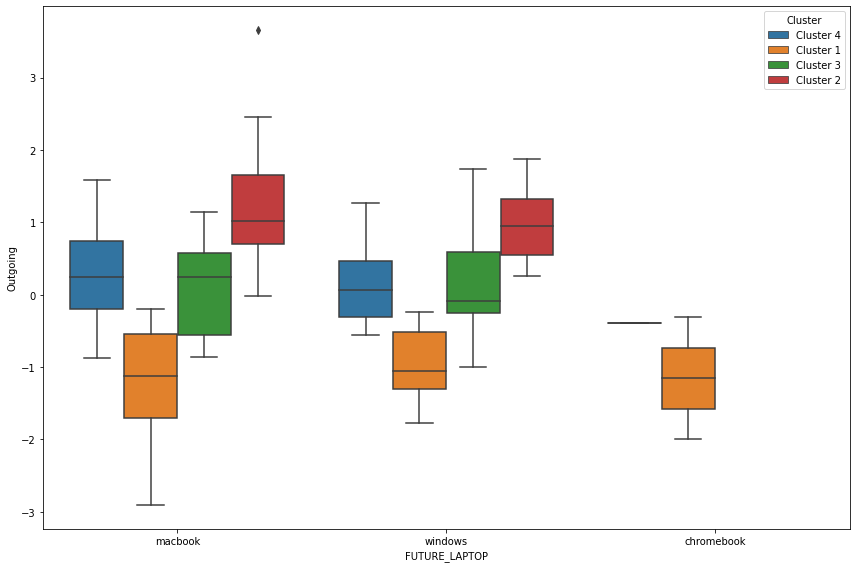

In [116]:
# Big 5 version
########################
# Current Laptop
########################

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'FUTURE_LAPTOP',
            y = 'Outgoing',
            hue = 'Cluster',
            data = big5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

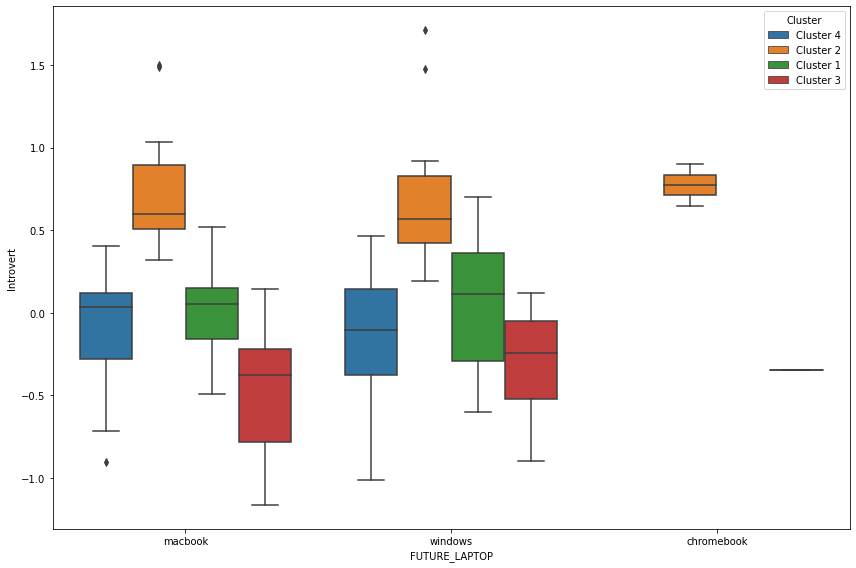

In [117]:
# Hult version
########################
# Future laptop
########################

# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'FUTURE_LAPTOP',
            y    = 'Introvert',
            hue  = 'Cluster',
            data = hult_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

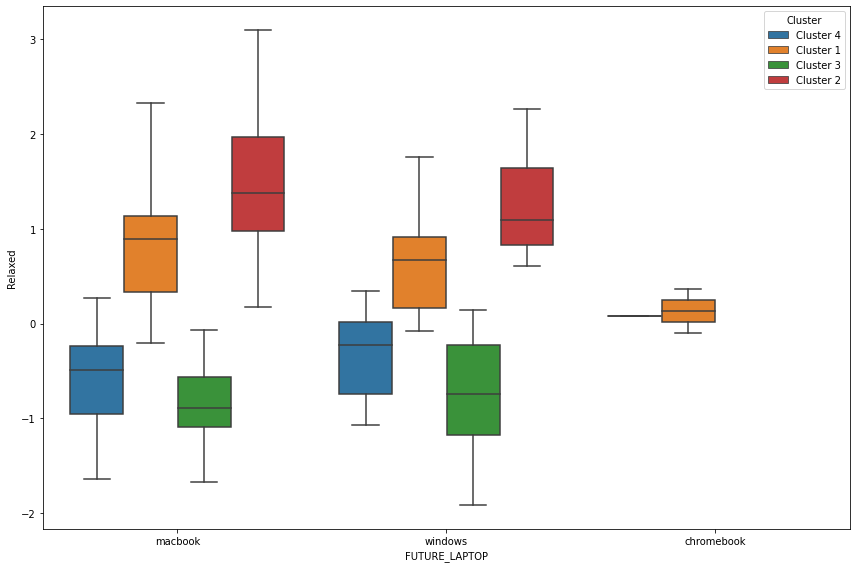

In [118]:
# Big 5 version
########################
# Current Laptop
########################

# Relaxed
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'FUTURE_LAPTOP',
            y = 'Relaxed',
            hue = 'Cluster',
            data = big5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<body>
<h1>Insights</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;"/>


We decided to analyze a few clusters and create recommendations per each group.
    
In terms of marketing, we recommend:<br>
<ul>    
    <li>Using consumer-relevant ideas to deliver personalized messages curated for each personality trait.</li>
    <li>Creating personalized content like visual content and features.</li> 
    <li>Custom fitting the communications for each personality trait.</li>
    <li>Increase their engagement by building a better user experience and building a strong personal relationship for long-term business.</li>
</ul>
<ul>    
    <li>The <strong>Relaxed </strong>cluster is more likely to purchase MacBooks;</li>    
    <li>At the moment, there is a similar amount of Macbook and Windows computers - which is positive considering the future purchase intentions are mainly MacBooks;</li>
    <li>More present in the Business Analytics course (dual degree with MBA and one year);</li>
    <li>Mainly female-identifying responders.</li>
    <li>The general characteristics of this personality type are <strong>confident and comfortable in their own bubble</strong>.</li>
    <li>The Customer relevance - Frequent shoppers, more inclined towards online shopping, Influenced by mass behavior.</li>
</ul>
<ul>    
    <li>The <strong> Outgoing </strong>custer is more likely to get Macbooks in the future;</li>
    <li>None of the current laptops are Chromebooks, but there are responders hoping to get one in the future;</li>
    <li>Cluster 1 within this group has the least amount of MacBooks;</li>
    <li>Mainly female-identifying responders;</li>
    <li>Most of this group is in the one-year Business Analtyics degree.</li>
</ul>
<ul>    
    <li>The <strong>Introvert</strong> type of personality is self-reliant and seems less engaged while the outgoing is driven by energy when surrounded by people.</li>
    <li>The consumer relevance - Non-risk-takers, driven by motives of socializing for outgoers and independent for introverts.</li>
</ul>
<ul>    
    <li>The <strong> Non-Thinker </strong>custer is more likely to get Macbooks in the future;</li>
    <li>The group mainly has MacBooks (highlight is Cluster 3);</li>
    <li>Cluster 1 within this group has the least amount of MacBooks;</li>
    <li>Mainly male-identifying responders;</li>
    <li>Most of this group is in the dual degree for International Business and Business Analtyics degree.</li>
</ul> 
<h1>Conclusion</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
    
In conclusion, our team of analysts was able to study and clean the data set, in the hopes to find specific personality traits that would be more willing to purchase Apple computers. This process included taking care of the duplicate questions, studying the demographics of the data, clustering it, and drawing insights based on the personality types. We believe Apple should look into these specific personality groups, their information, and preferences to create a targeted and successful campaign. 
 

<h1>References</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
    
Anwer, J. (2018). 6 things to consider before you buy a laptop. Retrieved online from: <https://www.indiatoday.in/technology/buying-guide/story/6-things-to-consider-before-you-buy-a-laptop-321067-2016-05-02>.<br>
Kakulla, B. (2020). Older Adults Keep Pace on Tech Usage. Retrieved online: <https://www.aarp.org/research/topics/technology/info-2019/2020-technology-trends-older-americans.html>.<br>
Goldberg, L.R. (1993).  The structure of phenotypic personality traits.  American Psychologist, 48, 26-34.<br>
Goldberg, L.R. (1992). The development of markers for the Big-Five factor structure. Psychological assessment.<br>
Shaheem, S. (2019). Why every leader needs a growth mindset. Retrieved online from: <https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/>.       
    
</body>